# Synthetic experiments with $\texttt{LieDetect}$

Henrique Hennes https://github.com/HLovisiEnnes \
Raphaël Tinarrage https://raphaeltinarrage.github.io/

See the repo at https://github.com/HLovisiEnnes/LieDetect and the article at https://arxiv.org/abs/2309.03086

**This notebook gathers all the expriments on synthetic datasets presented in our article.**

In [1]:
from functions_20240715 import*

2024-07-23 14:07:17.903113: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-23 14:07:17.907693: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-07-23 14:07:17.907705: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Section 3

## Example 3.3

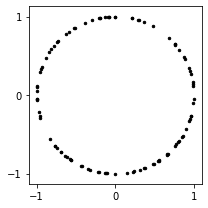

----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [0.0010447850481664842, 0.24333175290409248, 0.25054230206269845, 0.5050811599850423]
Eigengap #1: 232.90125881024105


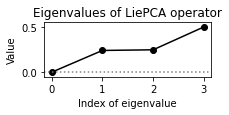

-----> Representation of T^2 in R^4 with frequencies ((1, 0), (0, 1))


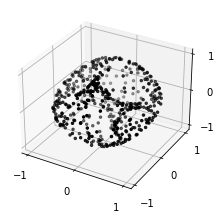

----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [0.002732119043659165, 0.003056717202627204, 0.10500553727145719, 0.10702804304398947]
Eigengap #2: 34.35238862829916


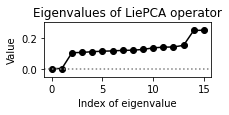

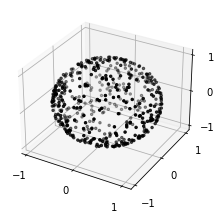

----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [0.0014123235600649482, 0.0015470194441509556, 0.001904876130277424, 0.1131417763190824]
Eigengap #2: 1.2313200958652912


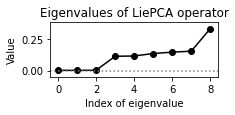

In [2]:
''' Examples Lie-PCA '''

' Lie-PCA on circle '

# Generate dataset
dim = 1
ambient_dim = 2
n_points = 100
X = np.random.randn(ambient_dim, n_points)
X /= np.linalg.norm(X, axis=0)
X = X.T

# Plot
fig = plt.figure(figsize=(3,3))
plt.scatter(X[:,0], X[:,1], c='black',s=6);
plt.locator_params(nbins=4)
plt.axis('equal'); plt.tight_layout(); plt.show(); fig.savefig('Figures/circ.png',dpi=fig.dpi,bbox_inches='tight');

# Compute Lie-PCA operator
n_neighbors = 5
method='localPCA'
Sigma = GetLiePCAOperator(X,n_neighbors,dim=dim,method=method)

# Plot Lie-PCA operator
vals = np.sort(np.real(np.linalg.eig(Sigma)[0])) #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(3,1)); ax = fig.add_subplot()
ax.plot(range(len(vals)),vals,c='black'); ax.scatter(range(len(vals)), vals,c='black'); 
ax.axhline(0,color='grey',linestyle='dotted'); 
ax.set_ylim((0-0.05,max(vals)+0.05)); ax.set_title('Eigenvalues of LiePCA operator');
ax.set_xlabel('Index of eigenvalue'); ax.set_ylabel('Value'); 
plt.show(); fig.savefig('Figures/lie_pca_circ.png',dpi=fig.dpi,bbox_inches='tight');

' Lie-PCA on torus '

# Generate dataset
dim = 2
ambient_dim = 4
n_points = 500
X, LieAlgebra, _ = SampleOnTorus(dim=dim, ambient_dim=ambient_dim, n_points=n_points, frequencies=(((1,0),(0,1))),
                              conjugate=False,right_multiply=False,verbose=True)

# Plot
fig = plt.figure(figsize=(3,3)); ax = fig.add_subplot(projection='3d')
Xpca = sklearn.decomposition.PCA(n_components=3).fit_transform(X)
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black',s=6);
plt.locator_params(nbins=4)
plt.tight_layout(); plt.show(); fig.savefig('Figures/torus.png',dpi=fig.dpi,bbox_inches='tight');

# Compute Lie-PCA operator
n_neighbors = 10
method='localPCA'
Sigma = GetLiePCAOperator(X,n_neighbors,dim=dim,method=method)

# Plot Lie-PCA operator
vals = np.sort(np.real(np.linalg.eig(Sigma)[0])) #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(3,1)); ax = fig.add_subplot()
ax.plot(range(len(vals)),vals,c='black'); ax.scatter(range(len(vals)), vals,c='black'); 
ax.axhline(0,color='grey',linestyle='dotted'); 
ax.set_ylim((0-0.05,max(vals)+0.05)); ax.set_title('Eigenvalues of LiePCA operator');
ax.set_xlabel('Index of eigenvalue'); ax.set_ylabel('Value'); 
plt.show(); fig.savefig('Figures/lie_pca_torus.png',dpi=fig.dpi,bbox_inches='tight');

' Lie-PCA on sphere '

# Generate dataset
dim = 2
ambient_dim = 3
n_points = 500
X = np.random.randn(ambient_dim, n_points)
X /= np.linalg.norm(X, axis=0)
X = X.T

# Plot
fig = plt.figure(figsize=(3,3)); ax = fig.add_subplot(projection='3d')
Xpca = sklearn.decomposition.PCA(n_components=3).fit_transform(X)
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black',s=6);
plt.locator_params(nbins=4)
plt.tight_layout(); plt.show(); fig.savefig('Figures/sphere.png',dpi=fig.dpi,bbox_inches='tight');

# Compute Lie-PCA operator
n_neighbors = 10
method='localPCA'
Sigma = GetLiePCAOperator(X,n_neighbors,dim=dim,method=method)

# Plot Lie-PCA operator
vals = np.sort(np.real(np.linalg.eig(Sigma)[0])) #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(3,1)); ax = fig.add_subplot()
ax.plot(range(len(vals)),vals,c='black'); ax.scatter(range(len(vals)), vals,c='black'); 
ax.axhline(0,color='grey',linestyle='dotted'); 
ax.set_ylim((0-0.05,max(vals)+0.05)); ax.set_title('Eigenvalues of LiePCA operator');
ax.set_xlabel('Index of eigenvalue'); ax.set_ylabel('Value'); 
plt.show(); fig.savefig('Figures/lie_pca_sphere.png',dpi=fig.dpi,bbox_inches='tight');

## Example 3.2

-----> Representation of T^1 in R^4 with frequencies [(1, 4)]


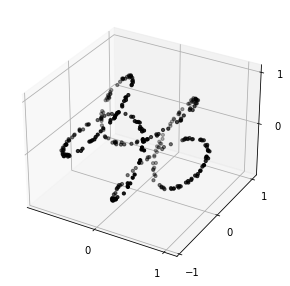

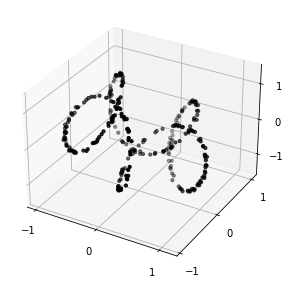

In [3]:
''' Runnning example '''

' Generate dataset '

# Parameters
ambient_dim = 4     # ambient dimension
dim = 1             # dimension of the torus (here, circle)
n_points = 300      # number of sample points
frequency_max = 4   # maximal angle parameter
var = 0.0001        # gaussian noise

# Generate dataset and plot
X, LieAlgebra, _ = SampleOnTorus(dim=dim, ambient_dim=ambient_dim, n_points=n_points,
                              conjugate=True,right_multiply=True,verbose=True, frequencies=[((1,4))])
X = X+np.random.multivariate_normal(np.array((0,0,0,0)), var*np.eye(4), n_points) # Add noise

# Plot
fig = plt.figure(figsize=(4,4)); ax = fig.add_subplot(projection='3d')
pca = sklearn.decomposition.PCA(n_components=3).fit(X)
Xpca = pca.transform(X)
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black',s=10);
plt.locator_params(nbins=4)
plt.tight_layout(); plt.show(); fig.savefig('Figures/RunningExample_X.png',dpi=fig.dpi,bbox_inches='tight');

# Define not orthogonal X
X_notorthogonal = X.copy()
X_notorthogonal[:,1] = 2*X_notorthogonal[:,1]

# Plot
fig = plt.figure(figsize=(4,4)); ax = fig.add_subplot(projection='3d')
Xpca = pca.transform(X_notorthogonal)
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black',s=10);
plt.locator_params(nbins=4)
plt.tight_layout(); plt.show(); fig.savefig('Figures/RunningExample_X_notorthogonal.png',dpi=fig.dpi,bbox_inches='tight');

## Example 3.4

----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [0.0020212043811389663, 0.10628148586858435, 0.11287696918851459, 0.12068987170576558]
Eigengap #1: 52.583245346368095
Eigenvalues: [0.0020212  0.10628149 0.11287697 0.12068987 0.1347361  0.1419822
 0.14584318 0.22269008 0.22343672 0.24160013 0.24233332 0.25009585
 0.25158132 0.25412013 0.27430311 0.27540834]


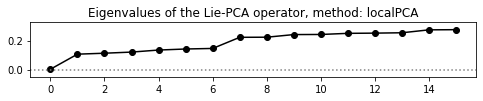

In [4]:
' Lie-PCA '

n_neighbors = 10
method='localPCA'
Sigma = GetLiePCAOperator(X,n_neighbors,dim=dim,method=method)

# Print eigenvalues
vals = np.sort(np.real(np.linalg.eig(Sigma)[0])) #find eigenvalues and vectors of sigma as a matrix
print('Eigenvalues:', vals)

# Plot Lie-PCA operator
fig = plt.figure(figsize=(8,1)); ax = fig.add_subplot()
ax.plot(range(len(vals)),vals,c='black'); ax.scatter(range(len(vals)), vals,c='black'); 
ax.axhline(0,color='grey',linestyle='dotted'); 
ax.set_ylim((0-0.05,max(vals)+0.05)); ax.set_title('Eigenvalues of the Lie-PCA operator, method: '+method);
plt.show();

## Example 3.5

In [5]:
# Find frequencies
frequency_max = 4
method = 'Stiefel'
OptimalFrequencies, OptimalLieAlgebra = FindClosestLieAlgebra('torus', Sigma,dim,ambient_dim,frequency_max=frequency_max,
                                                              method=method,verbosity=2)

----> Optimization problem via Stiefel for torus group <----
Number of frequencies to test: 5
Solve minimization problem... It 5/5. Duration 0:00:06 Expected remaining time 0:00:00.
The optimal frequencies found is ((1, 4),) with cost 8.649794621238206e-06
Frequencies ((1, 4),) - score 1e-05 (best cost #1/5)
Frequencies ((1, 3),) - score 0.00035 (best cost #2/5)
Frequencies ((1, 2),) - score 0.00284 (best cost #3/5)
Frequencies ((2, 3),) - score 0.00688 (best cost #4/5)
Frequencies ((3, 4),) - score 0.00917 (best cost #5/5)


## Example 3.6

In [6]:
# Find frequencies
frequency_max = 4
method = 'Grassmann'
OptimalFrequencies, OptimalLieAlgebra = FindClosestLieAlgebra('torus', Sigma,dim,ambient_dim,frequency_max=frequency_max,
                                                              method=method,verbosity=2)

----> Optimization problem via Grassmann for torus group <----
Number of frequencies to test: 5
Solve minimization problem... It 5/5. Duration 0:00:05 Expected remaining time 0:00:00.
The optimal frequencies found is ((1, 4),) with cost 2.0415238566864313e-05
Frequencies ((1, 4),) - score 2e-05 (best cost #1/5)
Frequencies ((1, 3),) - score 0.01081 (best cost #2/5)
Frequencies ((1, 2),) - score 0.09143 (best cost #3/5)
Frequencies ((2, 3),) - score 0.22221 (best cost #4/5)
Frequencies ((3, 4),) - score 0.29662 (best cost #5/5)


## Example 3.8

Non-symmetric Hausdorff distance from X to estimated orbit: 0.0517


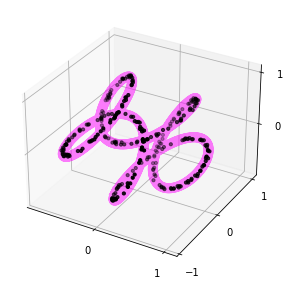

In [7]:
' Plot orbit '

# Generate estimated orbit
n_points_orbit = 300
x = X[0,:] #initial point of X
Orbit = GenerateOrbitTorus(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x, method='uniform')

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff,4))

# Plot
fig = plt.figure(figsize=(4,4)); ax = fig.add_subplot(projection='3d')
Xpca = pca.transform(X)
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black',s=10);
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta',lw=10,alpha=0.5); 
plt.locator_params(nbins=4)
plt.tight_layout(); plt.show(); fig.savefig('Figures/RunningExample_orbit_2.png',dpi=fig.dpi,bbox_inches='tight');

# Example 4.2

In [8]:
# Find frequencies
frequency_max = 4
method = 'NormalForm'
OptimalFrequencies, OptimalLieAlgebra = FindClosestLieAlgebra('torus', Sigma,dim,ambient_dim,frequency_max=frequency_max,
                                                              method=method,verbosity=2)

' Plot orbit '

# Generate estimated orbit
n_points_orbit = 300
x = X[0,:] #initial point of X
Orbit = GenerateOrbitTorus(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x, method='uniform')

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff,4))

----> Optimization problem via NormalForm for torus group <----
Number of frequencies to test: 5
Normalized frequencies found in normal form decomposition: (0.24563393086816793, 0.9693626627873864)
The optimal frequencies found is ((1, 4),) with cost 0.003194940583552368
Frequencies ((1, 4),) - score 0.00319 (best cost #1/5)
Frequencies ((1, 3),) - score 0.07356 (best cost #2/5)
Frequencies ((1, 2),) - score 0.21506 (best cost #3/5)
Frequencies ((2, 3),) - score 0.3382 (best cost #4/5)
Frequencies ((3, 4),) - score 0.39276 (best cost #5/5)
Non-symmetric Hausdorff distance from X to estimated orbit: 0.0517


Generate orbits... Execution time: 1 s.
Compute regularized OT... Execution time: 2 s.
2-Wasserstein distance from X to averaged estimated orbit: 0.28939642640575153 
Compute kde... Execution time: 19 s.
Plot kde... Execution time: 4 s.


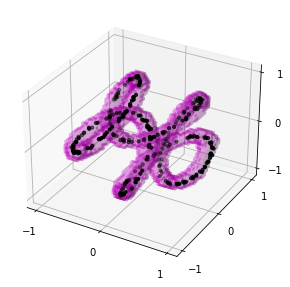

In [9]:
' Compute Wasserstein distance '

# Generate orbits
n_points_orbit = 50
start_time = ChronometerStart('Generate orbits... ')
Orbits = [GenerateOrbitTorus(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x) for x in X]
OrbitsConcatenation = np.concatenate(Orbits)
ChronometerStop(start_time,'s')

# Compute OT
lmbda=0.1
start_time = ChronometerStart('Compute regularized OT... ')
a, b = np.ones((len(X),)) / len(X), np.ones((len(OrbitsConcatenation),)) / len(OrbitsConcatenation)  # uniform distribution on samples
M = ot.dist(X, OrbitsConcatenation, metric='sqeuclidean')
T = ot.sinkhorn(a, b, M, lmbda, numItermax=10000)
Wasserstein = np.sqrt(np.sum(T*M))
ChronometerStop(start_time,'s')
print('\x1b[1;31m'+'2-Wasserstein distance from X to averaged estimated orbit:', Wasserstein,'\x1b[0m')

' Plot average orbit '

n_voxels = 35
bandwidth = 0.1

# Compute kde
start_time = ChronometerStart('Compute kde... ')
x, y, z = (np.indices((n_voxels+1, n_voxels+1, n_voxels+1))-n_voxels/2)/(n_voxels/2)
Cube = np.stack((x, y, z))
OrbitsConcatenationpca = pca.transform(OrbitsConcatenation)
kde = sklearn.neighbors.KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(OrbitsConcatenationpca)
CubeScores = np.exp(kde.score_samples(Cube.reshape(3,(n_voxels+1)**3).T)).reshape(np.shape(x))
SublevelSet = CubeScores>0.5
ChronometerStop(start_time,'s')

# Plot X
fig = plt.figure(figsize=(4,4)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black',s=10);

# Plot kde
ymin=0.5
SublevelSet = CubeScores>ymin
colors = np.zeros(CubeScores.shape + (3,))
r,g,b = 1,0,1
coefficients = 1-(CubeScores-ymin)/(np.max(CubeScores)-ymin)
colors[..., 0],colors[..., 1],colors[..., 2] = r*coefficients,g*coefficients,b*coefficients
n_voxels += 1
start_time = ChronometerStart('Plot kde... ')
x, y, z = (np.indices((n_voxels+1, n_voxels+1, n_voxels+1))-n_voxels/2)/(n_voxels/2)
ax.voxels(x,y,z,filled=SublevelSet, facecolors=colors, edgecolor=None, alpha=0.2)
ChronometerStop(start_time,'s')
plt.locator_params(nbins=4)
plt.tight_layout(); plt.show(); fig.savefig('Figures/RunningExample_orbit_2_average.png',dpi=fig.dpi,bbox_inches='tight');

## Example 3.9

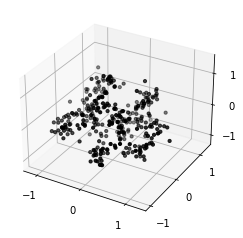

In [10]:
''' Algorithm corrupted dataset '''

' Corrupt dataset '

# Add Gaussian noise
sigma = 0.01
gaussian_noise = np.random.multivariate_normal(mean=[0]*ambient_dim, cov=sigma*np.eye(ambient_dim), size=len(X))
X = X + gaussian_noise

# Add anomalous points
anomalous_points = np.random.uniform(low=-1, high=1, size=(30,ambient_dim))
X = np.concatenate((X,anomalous_points))

# Plot
fig = plt.figure(figsize=(4,4)); ax = fig.add_subplot(projection='3d')
Xpca = pca.transform(X)
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black',s=10);
plt.locator_params(nbins=4)

----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [0.11514069342174063, 0.13336255900600405, 0.1502112814598368, 0.16448073634462368]
Eigengap #1: 1.1582573896573634
Eigenvalues: [0.11514069 0.13336256 0.15021128 0.16448074 0.16724805 0.17940676
 0.18537849 0.18881844 0.19202453 0.20201573 0.20322983 0.21015762
 0.21602906 0.21994671 0.23206708 0.24048244]


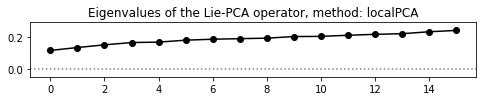

----> Optimization problem via NormalForm for torus group <----
Number of frequencies to test: 5
The optimal frequencies found is ((1, 4),) with cost 0.04911048153767759
Non-symmetric Hausdorff distance from X to estimated orbit: 1.2293


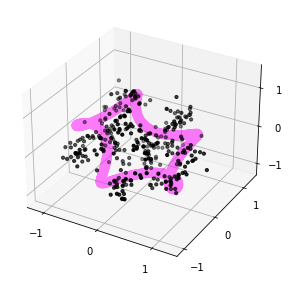

In [11]:
' Lie-PCA '

n_neighbors = 10
method='localPCA'
Sigma = GetLiePCAOperator(X,n_neighbors,dim=dim,method=method)

# Print eigenvalues
vals = np.sort(np.real(np.linalg.eig(Sigma)[0])) #find eigenvalues and vectors of sigma as a matrix
print('Eigenvalues:', vals)

# Plot Lie-PCA operator
fig = plt.figure(figsize=(8,1)); ax = fig.add_subplot()
ax.plot(range(len(vals)),vals,c='black'); ax.scatter(range(len(vals)), vals,c='black'); 
ax.axhline(0,color='grey',linestyle='dotted'); 
ax.set_ylim((0-0.05,max(vals)+0.05)); ax.set_title('Eigenvalues of the Lie-PCA operator, method: '+method);
plt.show();

' LieDetect '
frequency_max = 4
method = 'NormalForm'
OptimalFrequencies, OptimalLieAlgebra = FindClosestLieAlgebra('torus', Sigma,dim,ambient_dim,frequency_max=frequency_max,
                                                              method=method,verbosity=1)

' Plot orbit '

# Generate estimated orbit
n_points_orbit = 500
x = X[-1,:] #initial point of X
Orbit = GenerateOrbitTorus(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x, method='uniform')

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff,4))

# Plot
fig = plt.figure(figsize=(4,4)); ax = fig.add_subplot(projection='3d')
Xpca = pca.transform(X)
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black',s=10);
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta',lw=10,alpha=0.5); 
plt.locator_params(nbins=4)
plt.tight_layout(); plt.show(); fig.savefig('Figures/RunningExample_corrupted_orbit.png',dpi=fig.dpi,bbox_inches='tight');

Generate orbits... Execution time: 1 s.
Compute regularized OT... Execution time: 1 s.
2-Wasserstein distance from X to averaged estimated orbit: 0.4068531325059597 
Compute kde... Execution time: 18 s.
Plot kde... Execution time: 3 s.


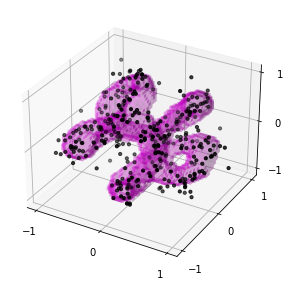

In [12]:
' Compute Wasserstein distance '

# Generate orbits
n_points_orbit = 50
start_time = ChronometerStart('Generate orbits... ')
Orbits = [GenerateOrbitTorus(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x) for x in X]
OrbitsConcatenation = np.concatenate(Orbits)
ChronometerStop(start_time,'s')

# Compute OT
lmbda=0.1
start_time = ChronometerStart('Compute regularized OT... ')
a, b = np.ones((len(X),)) / len(X), np.ones((len(OrbitsConcatenation),)) / len(OrbitsConcatenation)  # uniform distribution on samples
M = ot.dist(X, OrbitsConcatenation, metric='sqeuclidean')
T = ot.sinkhorn(a, b, M, lmbda, numItermax=10000)
Wasserstein = np.sqrt(np.sum(T*M))
ChronometerStop(start_time,'s')
print('\x1b[1;31m'+'2-Wasserstein distance from X to averaged estimated orbit:', Wasserstein,'\x1b[0m')

' Plot average orbit '

n_voxels = 35
bandwidth = 0.1

# Compute kde
start_time = ChronometerStart('Compute kde... ')
x, y, z = (np.indices((n_voxels+1, n_voxels+1, n_voxels+1))-n_voxels/2)/(n_voxels/2)
Cube = np.stack((x, y, z))
OrbitsConcatenationpca = pca.transform(OrbitsConcatenation)
kde = sklearn.neighbors.KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(OrbitsConcatenationpca)
CubeScores = np.exp(kde.score_samples(Cube.reshape(3,(n_voxels+1)**3).T)).reshape(np.shape(x))
SublevelSet = CubeScores>0.5
ChronometerStop(start_time,'s')

# Plot X
fig = plt.figure(figsize=(4,4)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black',s=10);

# Plot kde
ymin=0.275
SublevelSet = CubeScores>ymin
colors = np.zeros(CubeScores.shape + (3,))
r,g,b = 1,0,1
coefficients = 1-(CubeScores-ymin)/(np.max(CubeScores)-ymin)
colors[..., 0],colors[..., 1],colors[..., 2] = r*coefficients,g*coefficients,b*coefficients
n_voxels += 1
start_time = ChronometerStart('Plot kde... ')
x, y, z = (np.indices((n_voxels+1, n_voxels+1, n_voxels+1))-n_voxels/2)/(n_voxels/2)
ax.voxels(x,y,z,filled=SublevelSet, facecolors=colors, edgecolor=None, alpha=0.2)
ChronometerStop(start_time,'s')
plt.locator_params(nbins=4)
plt.tight_layout(); plt.show(); fig.savefig('Figures/RunningExample_corrupted_orbit_average.png',dpi=fig.dpi,bbox_inches='tight');

# Section 4.1

## Example 4.3

-----> Representation of T^1 in R^10 with frequencies [(2, 4, 5, 7, 8)]


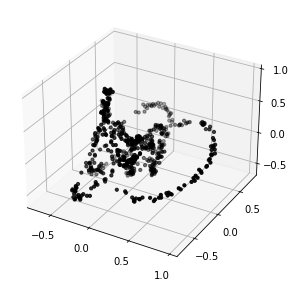

----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [0.00362318989555773, 0.041141517932678985, 0.04370505708415706, 0.047034244428076785]
Eigengap #1: 11.355054280517066
Eigenvalues: [0.00362319 0.04114152 0.04370506 0.04703424 0.04933818 0.0523968
 0.05442321 0.05977345 0.06242689 0.06481577 0.06688198 0.06705279
 0.06774627 0.06819875 0.06943839 0.0707707  0.07154566 0.07261173
 0.07280682 0.07395021 0.0759261  0.07763139 0.07766885 0.07865944
 0.08010698 0.08130681 0.08172571 0.08276377 0.08344298 0.08451895
 0.08480564 0.08517128 0.08550428 0.08633725 0.08719291 0.08801861
 0.08842319 0.08866093 0.08928781 0.08946716 0.0899993  0.09030614
 0.09071524 0.09108894 0.09123028 0.09154698 0.09168371 0.0929788
 0.093255   0.09374225 0.09395844 0.09418329 0.09433764 0.09504636
 0.09604491 0.09645241 0.0969579  0.09721804 0.09773186 0.0979353
 0.09821543 0.09865399 0.09980555 0.10034297 0.10060296 0.10079992
 0.10131579 0.10163287 0.10174001 0.10181008 0.10224

In [13]:
''' Algorithm on the representations of SO(2) in R^10 - ((2, 4, 5, 7, 8)) '''

' Generate dataset '

# Parameters
ambient_dim = 10     # ambient dimension
dim = 1              # dimension of the torus (here, circle)
n_points = 600       # number of sample points
frequency_max = 10   # maximal angle parameter

# Generate dataset
X, LieAlgebra, Frequencies = SampleOnTorus(dim=dim, ambient_dim=ambient_dim, n_points=n_points,
                              conjugate=True,right_multiply=True,verbose=True, frequencies=[((2, 4, 5, 7, 8))])

# Add Gaussian noise
sigma = 0.02**2 # gaussian noise
gaussian_noise = np.random.multivariate_normal(mean=[0]*ambient_dim, cov=sigma*np.eye(ambient_dim), size=len(X))
X = X + gaussian_noise

# Plot
fig = plt.figure(figsize=(4,4)); ax = fig.add_subplot(projection='3d')
pca = sklearn.decomposition.PCA(n_components=3).fit(X)
Xpca = pca.transform(X)
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black',s=10);
plt.locator_params(nbins=4)
plt.tight_layout(); plt.show(); 

' Lie-PCA '

n_neighbors = 10
method='localPCA'
Sigma = GetLiePCAOperator(X,n_neighbors,dim=dim,method=method)

# Print eigenvalues
vals = np.sort(np.real(np.linalg.eig(Sigma)[0])) #find eigenvalues and vectors of sigma as a matrix
print('Eigenvalues:', vals)

----> Optimization problem via NormalForm for torus group <----
Number of frequencies to test: 251
The optimal frequencies found is ((2, 4, 5, 7, 8),) with cost 0.008480060272987361
----> The frequencies [(2, 4, 5, 7, 8)] and ((2, 4, 5, 7, 8),) are equivalent <----
Non-symmetric Hausdorff distance from X to estimated orbit: 0.245


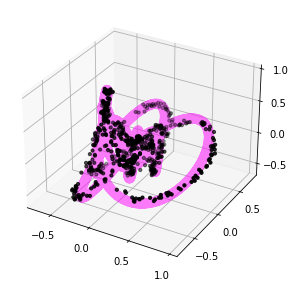

In [14]:
' LieDetect '
frequency_max = 10
method = 'NormalForm'
OptimalFrequencies, OptimalLieAlgebra = FindClosestLieAlgebra('torus', Sigma,dim,ambient_dim,frequency_max=frequency_max,
                                                              method=method,verbosity=1)
# Check if found frequencies are correct
AreFrequencesEquivalent(Frequencies,OptimalFrequencies,verbose=True)

' Plot orbit '

# Generate estimated orbit
n_points_orbit = 500
x = X[0,:] #initial point of X
Orbit = GenerateOrbitTorus(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x, method='uniform')

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff,4))

# Plot
fig = plt.figure(figsize=(4,4)); ax = fig.add_subplot(projection='3d')
Xpca = pca.transform(X)
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black',s=10);
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta',lw=10,alpha=0.5); 
plt.locator_params(nbins=4)
plt.tight_layout(); plt.show(); fig.savefig('Figures/Example_corrupted_orbit_R10.png',dpi=fig.dpi,bbox_inches='tight');

Generate orbits... Execution time: 2 s.
Compute regularized OT... Execution time: 6 s.
2-Wasserstein distance from X to averaged estimated orbit: 0.34053463322219885 
Compute kde... Execution time: 36 s.
Plot kde... Execution time: 2 s.


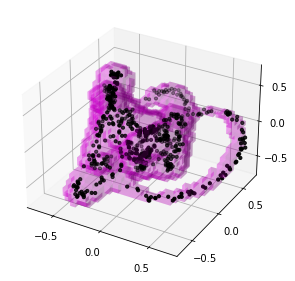

In [15]:
' Compute Wasserstein distance '

# Generate orbits
n_points_orbit = 50
start_time = ChronometerStart('Generate orbits... ')
Orbits = [GenerateOrbitTorus(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x) for x in X]
OrbitsConcatenation = np.concatenate(Orbits)
ChronometerStop(start_time,'s')

# Compute OT
lmbda=0.1
start_time = ChronometerStart('Compute regularized OT... ')
a, b = np.ones((len(X),)) / len(X), np.ones((len(OrbitsConcatenation),)) / len(OrbitsConcatenation)  # uniform distribution on samples
M = ot.dist(X, OrbitsConcatenation, metric='sqeuclidean')
T = ot.sinkhorn(a, b, M, lmbda, numItermax=10000)
Wasserstein = np.sqrt(np.sum(T*M))
ChronometerStop(start_time,'s')
print('\x1b[1;31m'+'2-Wasserstein distance from X to averaged estimated orbit:', Wasserstein,'\x1b[0m')

' Plot average orbit '

n_voxels = 35
bandwidth = 0.1

# Compute kde
start_time = ChronometerStart('Compute kde... ')

x, y, z = (np.indices((n_voxels+1, n_voxels+1, n_voxels+1))-n_voxels/2)/(n_voxels/2)
Cube = np.stack((x, y, z))
OrbitsConcatenationpca = pca.transform(OrbitsConcatenation)
kde = sklearn.neighbors.KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(OrbitsConcatenationpca)
CubeScores = np.exp(kde.score_samples(Cube.reshape(3,(n_voxels+1)**3).T)).reshape(np.shape(x))
SublevelSet = CubeScores>0.5
ChronometerStop(start_time,'s')

# Plot X
fig = plt.figure(figsize=(4,4)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black',s=10);

# Plot kde
ymin=0.5
SublevelSet = CubeScores>ymin
colors = np.zeros(CubeScores.shape + (3,))
r,g,b = 1,0,1
coefficients = 1-(CubeScores-ymin)/(np.max(CubeScores)-ymin)
colors[..., 0],colors[..., 1],colors[..., 2] = r*coefficients,g*coefficients,b*coefficients
n_voxels += 1
start_time = ChronometerStart('Plot kde... ')
x, y, z = (np.indices((n_voxels+1, n_voxels+1, n_voxels+1))-n_voxels/2)/(n_voxels/2)
ax.voxels(x,y,z,filled=SublevelSet, facecolors=colors, edgecolor=None, alpha=0.2)
ChronometerStop(start_time,'s')
plt.locator_params(nbins=4)
ax.set_xlim((-0.75,0.75)); ax.set_ylim((-0.75,0.75)); ax.set_zlim((-0.75,0.75))
plt.tight_layout(); plt.show(); fig.savefig('Figures/Example_corrupted_orbit_R10_average.png',dpi=fig.dpi,bbox_inches='tight');

# Section 4.2

## Example 4.5

-----> Representation of T^2 in R^6 with frequencies ((1, 2, 2), (2, 1, 2))
----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [0.003511282334030045, 0.003887293889754708, 0.0699689568011161, 0.07157660652619212]
Eigengap #2: 17.999399784391198
Eigenvalues: [0.00351128 0.00388729 0.06996896 0.07157661 0.07444429 0.0753582
 0.07701586 0.08115974 0.0826336  0.08481735 0.08616806 0.08795183
 0.08953921 0.09289043 0.09800397 0.10394096 0.10515982 0.10673495
 0.11251743 0.12016221 0.12456631 0.12564004 0.1278989  0.13143241
 0.13862056 0.142032   0.1437941  0.14514435 0.14822651 0.14913188
 0.15652623 0.15706994 0.16720281 0.16921601 0.17262754 0.17342835]


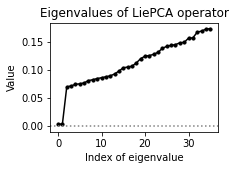

----> Optimization problem via NormalForm for torus group <----
Number of frequencies to test: 56
Test commutation: 0.013862411719027854
Normalized frequencies found in normal form decomposition: ((-0.48828234275123494, -0.29482863073622806, 0.4178413436386111), (0.06031842451195163, 0.5404838298650476, 0.4518668437347829))
There are 2688 expanded frequencies to test, out of 56
The optimal frequencies found is ((2, 2, -1), (2, 1, -2)) with cost 0.019249847141315224
Frequencies ((1, 2, 2), (2, 1, 2)) - score 0.01925 (best cost #1/56)
Frequencies ((1, 2, 2), (2, 0, 1)) - score 0.19592 (best cost #2/56)
Frequencies ((0, 1, 2), (2, 2, 1)) - score 0.19592 (best cost #3/56)
Frequencies ((0, 1, 2), (2, 2, 2)) - score 0.21706 (best cost #4/56)
Frequencies ((0, 1, 2), (1, 1, 1)) - score 0.21706 (best cost #5/56)
Frequencies ((0, 1, 1), (1, 0, 2)) - score 0.21706 (best cost #6/56)
Frequencies ((0, 2, 2), (1, 0, 2)) - score 0.21706 (best cost #7/56)
Frequencies ((0, 1, 2), (2, 1, 0)) - score 0.21

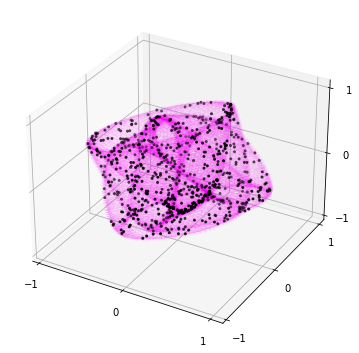

In [16]:
''' Algorithm on the representations of T^2 in R^6 - ((1, 2, 2), (2, 1, 2)) '''

' Generate dataset '

# Parameters
ambient_dim = 6     # ambient dimension
dim = 2             # dimension of the torus 
n_points = 750      # number of sample points
frequency_max = 2   # maximal angle parameter

# Generate dataset
X, LieAlgebra, Frequencies = SampleOnTorus(dim=dim, ambient_dim=ambient_dim, n_points=n_points, frequency_max=frequency_max,
                              conjugate=True,right_multiply=True,verbose=2,
                                frequencies=((1, 2, 2), (2, 1, 2)))

' Lie-PCA '

n_neighbors = 15
method='localPCA'
Sigma = GetLiePCAOperator(X,n_neighbors,dim=dim,method=method)

# Print eigenvalues
vals = np.sort(np.real(np.linalg.eig(Sigma)[0])) #find eigenvalues and vectors of sigma as a matrix
print('Eigenvalues:', vals)

# Plot Lie-PCA operator
vals = np.sort(np.real(np.linalg.eig(Sigma)[0])) #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(3,2)); ax = fig.add_subplot()
ax.plot(range(len(vals)),vals,c='black'); ax.scatter(range(len(vals)), vals,c='black', s=10); 
ax.axhline(0,color='grey',linestyle='dotted'); 
ax.set_ylim((0-0.01,max(vals)+0.01)); ax.set_title('Eigenvalues of LiePCA operator');
ax.set_xlabel('Index of eigenvalue'); ax.set_ylabel('Value'); 
plt.show(); fig.savefig('Figures/Example_torus_R6_LiePCA.png',dpi=fig.dpi,bbox_inches='tight');

' LieDetect '

# Find frequencies
frequency_max = 2
method = 'NormalForm'
OptimalFrequencies, OptimalLieAlgebra = FindClosestLieAlgebra('torus', Sigma,dim,ambient_dim,frequency_max=frequency_max,
                                                              method=method,verbosity=2)

# Check if found frequencies are correct
AreFrequencesEquivalent(Frequencies,OptimalFrequencies,verbose=True)

' Plot orbit '

# Generate estimated orbit
n_points_orbit = 150
x = X[0,:] #initial point of X
Orbit = GenerateOrbitTorus(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x, method='uniform')

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff,4))

# Plot orbit
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5,5)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black', s=4);
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta',lw=0.5, alpha=0.05,marker="3");
plt.locator_params(nbins=4)
plt.tight_layout(); plt.show(); fig.savefig('Figures/Example_torus_R6_2.png',dpi=fig.dpi,bbox_inches='tight');

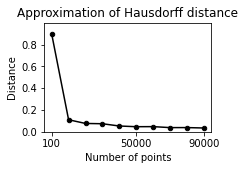

In [17]:
# Plot Hausdorff distances

HausdorffDistances = {}
for n_points_orbit in range(100,100000,10000):
    # Generate estimated orbit
    x = X[0,:] #initial point of X
    Orbit = GenerateOrbitTorus(OptimalLieAlgebra, OptimalFrequencies, n_points=int(np.sqrt(n_points_orbit)), x=x)

    # Compute non-symmetric Hausdorff
    Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
    HausdorffDistances[n_points_orbit] = Hausdorff
    
fig = plt.figure(figsize=(3,2)); ax = fig.add_subplot()
x, y = list(HausdorffDistances.keys()), list(HausdorffDistances.values())
ax.plot(x,y,c='black', label='_nolegend_')
ax.scatter(x, y, c='black', label='_nolegend_', s=20)
ax.set_ylim((-0.0,np.max(y)+0.1))
ax.set_xticks([100,50000,90000]); 
ax.set_title('Approximation of Hausdorff distance');
ax.set_xlabel('Number of points'); ax.set_ylabel('Distance'); 
plt.show(); fig.savefig('Figures/Example_torus_R6_Hausdorff.png',dpi=fig.dpi,bbox_inches='tight');

## Example 4.6

-----> Representation of T^3 in R^8 with frequencies ((-1, 1, 0, 1), (-2, 1, -1, 2), (-2, 1, -2, 0))
----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [0.03714423654289915, 0.040412757017920894, 0.04320024971027743, 0.04733064112407295]
Eigengap #3: 1.0956103596969
Eigenvalues: [0.03714424 0.04041276 0.04320025 0.04733064 0.04982751 0.05585201
 0.05936008 0.0599533  0.06173205 0.06353325 0.06407241 0.06480747
 0.06664024 0.06698344 0.06736771 0.06782369 0.06898014 0.06936979
 0.07000955 0.07091013 0.07139183 0.07283046 0.07348545 0.07386311
 0.07434817 0.07529458 0.0753685  0.07620236 0.07648111 0.07793706
 0.07818044 0.078657   0.07911259 0.07979124 0.08002747 0.08062462
 0.0814009  0.08160773 0.08226601 0.08261963 0.08341988 0.08386703
 0.08418292 0.08488732 0.08525085 0.0855926  0.08621951 0.08666535
 0.08693593 0.08765984 0.08858645 0.08873219 0.09004282 0.09054501
 0.09095757 0.09127471 0.09251299 0.09314625 0.09423727 0.09610146
 0.10386506 0.12507

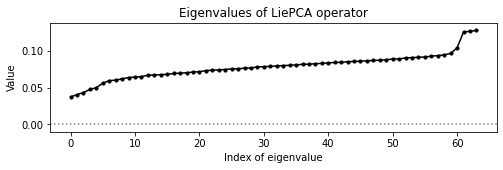

----> Optimization problem via NormalForm for torus group <----
Number of frequencies to test: 14476
Test commutation: 0.07298725109588922
Normalized frequencies found in normal form decomposition: ((0.5182879406837035, 0.4213361714741086, -0.20092208981731874, 0.10040261862635093), (0.1404534539797365, -0.42122855250025465, -0.5447830066723292, -0.042856344839365255), (0.2412396269382816, -0.06801481387717331, 0.16317628644524312, -0.6376247319009106))
There are 5558784 expanded frequencies to test, out of 14476
The optimal frequencies found is ((2, 1, 0, -2), (0, 1, 2, -1), (1, 2, 1, 0)) with cost 0.15547746713217267
Frequencies ((0, 1, 2, 2), (2, 1, 0, 1), (1, 2, 1, 0)) - score 0.15548 (best cost #1/14476)
Frequencies ((0, 1, 2, 2), (1, 2, 0, 1), (2, 1, 1, 0)) - score 0.15548 (best cost #2/14476)
Frequencies ((0, 1, 1, 2), (1, 0, 2, 1), (2, 2, 1, 0)) - score 0.15548 (best cost #3/14476)
Frequencies ((0, 1, 1, 2), (1, 0, 2, 1), (2, 2, 0, 1)) - score 0.15548 (best cost #4/14476)
Frequ

In [18]:
''' Algorithm on the representations of T^3 in R^8 '''

' Generate dataset '

# Parameters
ambient_dim = 8     # ambient dimension
dim = 3             # dimension of the torus 
n_points = 1500     # number of sample points
frequency_max = 2   # maximal angle parameter

# Generate dataset
X, LieAlgebra, Frequencies = SampleOnTorus(dim=dim, ambient_dim=ambient_dim, n_points=n_points, frequency_max=frequency_max,
                              conjugate=True,right_multiply=True,verbose=2)

' Lie-PCA '

n_neighbors = 50
method='localPCA'
Sigma = GetLiePCAOperator(X,n_neighbors,dim=dim,method=method)

# Print eigenvalues
vals = np.sort(np.real(np.linalg.eig(Sigma)[0])) #find eigenvalues and vectors of sigma as a matrix
print('Eigenvalues:', vals)

# Plot Lie-PCA operator
vals = np.sort(np.real(np.linalg.eig(Sigma)[0])) #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(8,2)); ax = fig.add_subplot()
ax.plot(range(len(vals)),vals,c='black'); ax.scatter(range(len(vals)), vals,c='black', s=10); 
ax.axhline(0,color='grey',linestyle='dotted'); 
ax.set_ylim((0-0.01,max(vals)+0.01)); ax.set_title('Eigenvalues of LiePCA operator');
ax.set_xlabel('Index of eigenvalue'); ax.set_ylabel('Value'); 
plt.show();

' LieDetect '

# Find frequencies
frequency_max = 2
method = 'NormalForm'
OptimalFrequencies, OptimalLieAlgebra = FindClosestLieAlgebra('torus', Sigma,dim,ambient_dim,frequency_max=frequency_max,
                                                              method=method,verbosity=2)

# Check if found frequencies are correct
AreFrequencesEquivalent(Frequencies,OptimalFrequencies,verbose=True)

' Plot orbit '

# Generate estimated orbit
n_points_orbit = 100
x = X[0,:] #initial point of X
Orbit = GenerateOrbitTorus(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x, method='uniform')

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff,4))

# Section 4.3

## Example 4.8

-----> Representation of SU(2) in R^5 with partition [5]
----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [0.011013526021165232, 0.013185924908728342, 0.01457602850177627, 0.05674191706238552]
Eigengap #3: 3.8928242391588914
Eigenvalues: [0.01101353 0.01318592 0.01457603 0.05674192 0.05711048 0.05902082
 0.06121574 0.06490662 0.06636415 0.06958142 0.07113855 0.07390546
 0.07609533 0.07982052 0.08125707 0.08474398 0.0861426  0.09326769
 0.09754449 0.10338374 0.11251819 0.11645426 0.12610159 0.12677721
 0.19713269]


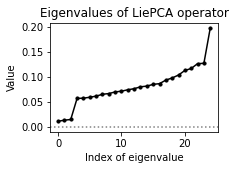

Partitions generating an orbit that spans the whole ambient space: 1 out of 3 - [(5,)]
----> Optimization problem via Stiefel for SU(2) group <----
Solve minimization problem... It 3/3. Duration 0:00:16 Expected remaining time 0:00:00.
The optimal frequencies found is (5,) with cost 0.000613485326511287
Frequencies (5,) - score 0.00061 (best cost #1/3)
Frequencies (1, 1, 3) - score 0.00771 (best cost #2/3)
Frequencies (1, 4) - score 0.01018 (best cost #3/3)
----> The frequencies [5] and (5,) are equivalent <----
Non-symmetric Hausdorff distance from X to estimated orbit: 0.0697


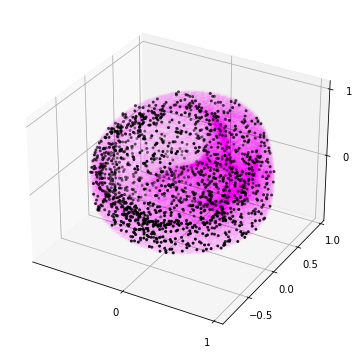

In [19]:
''' Algorithm on the representations of SU(2) in R^5 - [5] '''

' Generate dataset '

# Parameters
group = 'SU(2)'     # compact Lie group considered
ambient_dim = 5     # ambient dimension
dim = 3             # dimension of the group/orbit 
n_points = 1500     # number of sample points

# Generate dataset
X, LieAlgebra, Frequencies = SampleOnSU2(ambient_dim=ambient_dim, n_points=n_points, frequencies=[5], verbose=True)

' Lie-PCA '

n_neighbors = 30
method='localPCA'
Sigma = GetLiePCAOperator(X,n_neighbors,dim=dim,method=method)

# Print eigenvalues
vals = np.sort(np.real(np.linalg.eig(Sigma)[0])) #find eigenvalues and vectors of sigma as a matrix
print('Eigenvalues:', vals)

# Plot Lie-PCA operator
vals = np.sort(np.real(np.linalg.eig(Sigma)[0])) #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(3,2)); ax = fig.add_subplot()
ax.plot(range(len(vals)),vals,c='black'); ax.scatter(range(len(vals)), vals,c='black', s=10); 
ax.axhline(0,color='grey',linestyle='dotted'); 
ax.set_ylim((0-0.01,max(vals)+0.01)); ax.set_title('Eigenvalues of LiePCA operator');
ax.set_xlabel('Index of eigenvalue'); ax.set_ylabel('Value'); 
plt.show(); fig.savefig('Figures/Example_SO3_R5_LiePCA.png',dpi=fig.dpi,bbox_inches='tight');

' LieDetect '

# Find frequencies
frequency_max = 2
method = 'Stiefel'
FrequenciesToTest = [tuple(f) for f in partition_su2(ambient_dim)]
FrequenciesToTestMaximal = [f for f in FrequenciesToTest if len(np.unique(f))==len(f) and 1 not in f]
print('Partitions generating an orbit that spans the whole ambient space:', len(FrequenciesToTestMaximal), 'out of', len(FrequenciesToTest), '-', FrequenciesToTestMaximal)
OptimalFrequencies, OptimalLieAlgebra = FindClosestLieAlgebra('SU(2)',Sigma,dim,ambient_dim,FrequenciesToTest=FrequenciesToTest,
                                                              method=method,verbosity=2)
# Check if found frequencies are correct
AreFrequencesEquivalent(Frequencies,OptimalFrequencies,verbose=True)

' Plot orbit '

# Generate estimated orbit
n_points_orbit = 50
x = X[0,:] #initial point of X
Orbit = GenerateOrbitSU2(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x)

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff,4))

# Plot orbit
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5,5)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black', s=4);
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta',lw=0.5, alpha=0.01,marker="3");
plt.locator_params(nbins=4)
plt.tight_layout(); plt.show(); 
# fig.savefig('Figures/Example_torus_R6_2.png',dpi=fig.dpi,bbox_inches='tight');

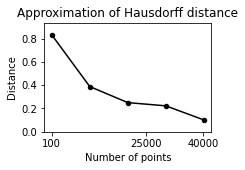

In [20]:
# Plot Hausdorff distances

HausdorffDistances = {}
# for n_points_orbit in range(100,100000,10000):
for n_points_orbit in range(100,50000,10000):
    # Generate estimated orbit
    x = X[0,:] #initial point of X
    Orbit = GenerateOrbitSU2(OptimalLieAlgebra, OptimalFrequencies, n_points=int(n_points_orbit**(1/3)), x=x)

    # Compute non-symmetric Hausdorff
    Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
    HausdorffDistances[n_points_orbit] = Hausdorff
    
fig = plt.figure(figsize=(3,2)); ax = fig.add_subplot()
x, y = list(HausdorffDistances.keys()), list(HausdorffDistances.values())
ax.plot(x,y,c='black', label='_nolegend_')
ax.scatter(x, y, c='black', label='_nolegend_', s=20)
ax.set_ylim((-0.0,np.max(y)+0.1))
ax.set_xticks([100,25000,40000]); 
ax.set_title('Approximation of Hausdorff distance');
ax.set_xlabel('Number of points'); ax.set_ylabel('Distance'); 
plt.show(); fig.savefig('Figures/Example_SO3_R5_Hausdorff.png',dpi=fig.dpi,bbox_inches='tight');

## Example 4.9

-----> Representation of SU(2) in R^7 with partition [3, 4]
----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [0.0009958827010698808, 0.0015142926999595421, 0.0015607071458507342, 0.0017016456799057828]
Eigengap #3: 1.0903042793324456


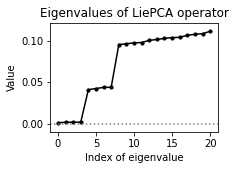

----> Optimization problem via Stiefel for SU(2) group <----
Solve minimization problem... It 6/6. Duration 0:37:38 Expected remaining time 0:00:00.
The optimal frequencies found is (3, 4) with cost 9.115628099850681e-06
Frequencies (3, 4) - score 1e-05 (best cost #1/6)
Frequencies (1, 1, 5) - score 0.00366 (best cost #2/6)
Frequencies (1, 3, 3) - score 0.00377 (best cost #3/6)
Frequencies (7,) - score 0.00554 (best cost #4/6)
Frequencies (1, 1, 1, 1, 3) - score 0.00869 (best cost #5/6)
Frequencies (1, 1, 1, 4) - score 0.01386 (best cost #6/6)
----> The frequencies [3, 4] and (3, 4) are equivalent <----
Non-symmetric Hausdorff distance from X to estimated orbit: 0.0696


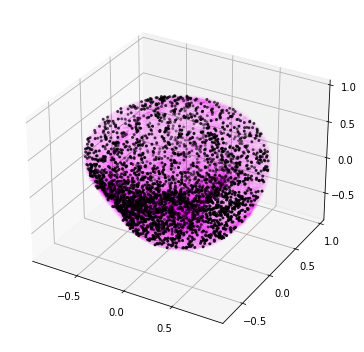

In [21]:
''' Algorithm on the representations of SU(2) in R^7 - [3,4] '''

# Parameters
group = 'SU(2)'     # compact Lie group considered
ambient_dim = 7     # ambient dimension
dim = 3             # dimension of the group/orbit 
n_points = 3000     # number of sample points

# Generate dataset
X, LieAlgebra, Frequencies = SampleOnSU2(ambient_dim=ambient_dim, n_points=n_points, frequencies=[3,4], verbose=True)

' Lie-PCA on skew-symmetric matrices '

n_neighbors = 30
method='localPCA'
Sigma = GetLiePCAOperator(X,n_neighbors,dim=dim,method=method)

# Define Lie-PCA operator on skew-symmetric matrices
Basis = []
for i in range(ambient_dim):
    for j in range(i+1,ambient_dim):
        A = np.zeros((ambient_dim,ambient_dim))
        A[i,j], A[j,i] = 1, -1
        Basis.append(A)        
SigmaSkew = [Sigma @ A.flatten() for A in Basis]
SigmaSkew = [A.reshape((ambient_dim,ambient_dim)) for A in SigmaSkew]
SigmaSkew = [SkewSymmetricToVector((A-A.T)/2) for A in SigmaSkew]
SigmaSkew = np.array(SigmaSkew)

# Plot Lie-PCA operator
vals = np.sort(np.real(np.linalg.eig(SigmaSkew)[0])) #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(3,2)); ax = fig.add_subplot()
ax.plot(range(len(vals)),vals,c='black'); ax.scatter(range(len(vals)), vals,c='black', s=10); 
ax.axhline(0,color='grey',linestyle='dotted'); 
ax.set_ylim((0-0.01,max(vals)+0.01)); ax.set_title('Eigenvalues of LiePCA operator');
ax.set_xlabel('Index of eigenvalue'); ax.set_ylabel('Value'); 
plt.show(); fig.savefig('Figures/Example_SU2_R7_34_LiePCA.png',dpi=fig.dpi,bbox_inches='tight');

' LieDetect '

# Find frequencies
method = 'Stiefel'
OptimalFrequencies, OptimalLieAlgebra = FindClosestLieAlgebra('SU(2)',Sigma,dim,ambient_dim,method=method,verbosity=2)

# Check if found frequencies are correct
AreFrequencesEquivalent(Frequencies,OptimalFrequencies,verbose=True)

' Plot orbit '

# Generate estimated orbit
n_points_orbit = 50
x = X[0,:] #initial point of X
Orbit = GenerateOrbitSU2(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x)

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff,4))

# Plot orbit
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5,5)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black', s=4);
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta',lw=0.5, alpha=0.01,marker="3");
plt.locator_params(nbins=4)
plt.tight_layout(); plt.show(); fig.savefig('Figures/Example_SU2_R7_34.png',dpi=fig.dpi,bbox_inches='tight');

-----> Representation of SU(2) in R^7 with partition [7]
----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [0.05097581177460256, 0.054134960096480306, 0.055563590670482034, 0.06399477534452021]
Eigengap #3: 1.151739377752583


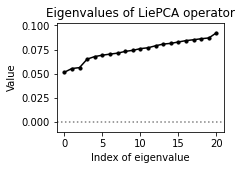

----> Optimization problem via Stiefel for SU(2) group <----
Solve minimization problem... It 6/6. Duration 0:07:16 Expected remaining time 0:00:00.
The optimal frequencies found is (7,) with cost 0.00912189411692631
Frequencies (7,) - score 0.00912 (best cost #1/6)
Frequencies (1, 1, 5) - score 0.01126 (best cost #2/6)
Frequencies (1, 3, 3) - score 0.01234 (best cost #3/6)
Frequencies (1, 1, 1, 1, 3) - score 0.01295 (best cost #4/6)
Frequencies (3, 4) - score 0.01317 (best cost #5/6)
Frequencies (1, 1, 1, 4) - score 0.01448 (best cost #6/6)
----> The frequencies [7] and (7,) are equivalent <----
Non-symmetric Hausdorff distance from X to estimated orbit: 0.1689


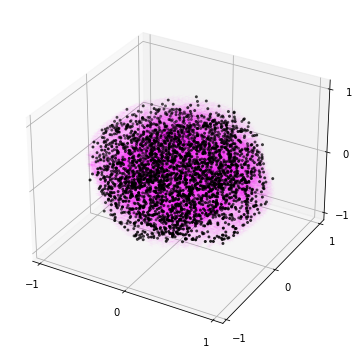

In [22]:
''' Algorithm on the representations of SU(2) in R^7 - [7] '''

# Parameters
group = 'SU(2)'     # compact Lie group considered
ambient_dim = 7     # ambient dimension
dim = 3             # dimension of the group/orbit 
n_points = 3000     # number of sample points

# Generate dataset
X, LieAlgebra, Frequencies = SampleOnSU2(ambient_dim=ambient_dim, n_points=n_points, frequencies=[7], verbose=True)

' Lie-PCA on skew-symmetric matrices '

n_neighbors = 30
method='localPCA'
Sigma = GetLiePCAOperator(X,n_neighbors,dim=dim,method=method)

# Define Lie-PCA operator on skew-symmetric matrices
Basis = []
for i in range(ambient_dim):
    for j in range(i+1,ambient_dim):
        A = np.zeros((ambient_dim,ambient_dim))
        A[i,j], A[j,i] = 1, -1
        Basis.append(A)        
SigmaSkew = [Sigma @ A.flatten() for A in Basis]
SigmaSkew = [A.reshape((ambient_dim,ambient_dim)) for A in SigmaSkew]
SigmaSkew = [SkewSymmetricToVector((A-A.T)/2) for A in SigmaSkew]
SigmaSkew = np.array(SigmaSkew)

# Plot Lie-PCA operator
vals = np.sort(np.real(np.linalg.eig(SigmaSkew)[0])) #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(3,2)); ax = fig.add_subplot()
ax.plot(range(len(vals)),vals,c='black'); ax.scatter(range(len(vals)), vals,c='black', s=10); 
ax.axhline(0,color='grey',linestyle='dotted'); 
ax.set_ylim((0-0.01,max(vals)+0.01)); ax.set_title('Eigenvalues of LiePCA operator');
ax.set_xlabel('Index of eigenvalue'); ax.set_ylabel('Value'); 
plt.show(); fig.savefig('Figures/Example_SU2_R7_7_LiePCA.png',dpi=fig.dpi,bbox_inches='tight');

' LieDetect '

# Find frequencies
method = 'Stiefel'
OptimalFrequencies, OptimalLieAlgebra = FindClosestLieAlgebra('SU(2)',Sigma,dim,ambient_dim,method=method,verbosity=2)

# Check if found frequencies are correct
AreFrequencesEquivalent(Frequencies,OptimalFrequencies,verbose=True)

' Plot orbit '

# Generate estimated orbit
n_points_orbit = 50
x = X[0,:] #initial point of X
Orbit = GenerateOrbitSU2(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x)

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff,4))

# Plot orbit
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5,5)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black', s=4);
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta',lw=0.5, alpha=0.01,marker="3");
plt.locator_params(nbins=4)
plt.tight_layout(); plt.show(); fig.savefig('Figures/Example_SU2_R7_7.png',dpi=fig.dpi,bbox_inches='tight');

## Example 4.10

In [23]:
''' Algorithm on the representations of SU(2) in R^11 '''

for frequencies in [[3,8],[4,7],[11]]:
    ' Generate dataset '
    
    # Parameters
    group = 'SU(2)'     # compact Lie group considered
    ambient_dim = 11     # ambient dimension
    dim = 3             # dimension of the group/orbit 
    n_points = 5000     # number of sample points
    
    # Generate dataset
    X, LieAlgebra, Frequencies = SampleOnSU2(ambient_dim=ambient_dim, n_points=n_points, frequencies=frequencies, verbose=True)
    
    ' Lie-PCA  '
    
    n_neighbors = 30
    method='localPCA'
    Sigma = GetLiePCAOperator(X,n_neighbors,dim=dim,method=method,verbose=True)
        
    ' LieDetect '
    
    # Find frequencies
    method = 'Stiefel'
    OptimalFrequencies, OptimalLieAlgebra = FindClosestLieAlgebra('SU(2)',Sigma,dim,ambient_dim,method=method,verbosity=2)
    
    # Check if found frequencies are correct
    AreFrequencesEquivalent(Frequencies,OptimalFrequencies,verbose=True)
    
    ' Plot orbit '
    
    # Generate estimated orbit
    n_points_orbit = 50
    x = X[0,:] #initial point of X
    Orbit = GenerateOrbitSU2(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x)
    
    # Compute non-symmetric Hausdorff
    Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
    print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff,4))

-----> Representation of SU(2) in R^11 with partition [3, 8]
----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [0.0016604529635999138, 0.0022594719314446344, 0.0022899204842201358, 0.01919124802200038]
Eigengap #3: 8.380748656666228
----> Optimization problem via Stiefel for SU(2) group <----
Solve minimization problem... It 20/20. Duration 9:28:13 Expected remaining time 0:00:00.
The optimal frequencies found is (3, 8) with cost 3.9192855607391266e-05
Frequencies (3, 8) - score 4e-05 (best cost #1/20)
Frequencies (3, 3, 5) - score 0.00142 (best cost #2/20)
Frequencies (1, 3, 7) - score 0.0017 (best cost #3/20)
Frequencies (4, 7) - score 0.00215 (best cost #4/20)
Frequencies (1, 5, 5) - score 0.00229 (best cost #5/20)
Frequencies (1, 1, 1, 8) - score 0.00268 (best cost #6/20)
Frequencies (1, 1, 9) - score 0.00275 (best cost #7/20)
Frequencies (1, 1, 1, 3, 5) - score 0.0029 (best cost #8/20)
Frequencies (1, 1, 1, 1, 7) - score 0.00316 (best cost #9/20)
Fr

## Example 4.11

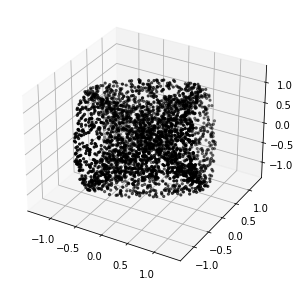

PCA eigenvalues: [0.1598418273975253, 0.16325831385066492, 0.16502196181945875, 0.16766536671961718, 0.17082488948701832, 0.17338764072571541]
----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [0.001306832607258728, 0.0013936994844476864, 0.0014339682663095264, 0.0015461683490837152]
Eigengap #3: 1.0782444670571043


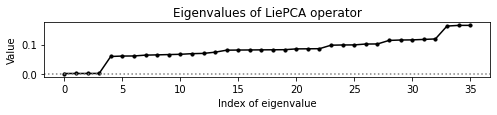

----> Optimization problem via Stiefel for SU(2) group <----
Solve minimization problem... It 4/4. Duration 0:12:04 Expected remaining time 0:00:00.
The optimal frequencies found is (3, 3) with cost 8.970365114211982e-06
Frequencies (3, 3) - score 1e-05 (best cost #1/4)
Frequencies (1, 5) - score 0.00413 (best cost #2/4)
Frequencies (1, 1, 1, 3) - score 0.01052 (best cost #3/4)
Frequencies (1, 1, 4) - score 0.01449 (best cost #4/4)
Non-symmetric Hausdorff distance from X to estimated orbit: 0.0871


In [26]:
''' Algorithm with SU(2) on the Stiefel manifold V(2,3) embedded in R^6 '''

# Parameters
ambient_dim = 6     # ambient dimension
group = 'SU(2)'     # Lie group considered
dim = 3             # dimension of the group
n_points = 3000     # number of sample points

# Sample on Stiefel manifold and plot
X = np.random.multivariate_normal([0]*6, cov = np.eye(6), size=n_points)
X = [x.reshape((3,2)) for x in X]
X = [x @ scipy.linalg.sqrtm(np.linalg.inv(x.T @ x)) for x in X]
X = np.array([x.flatten() for x in X])
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5,5)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black',s=5); plt.show();

# Print PCA eigenvalues
pca = sklearn.decomposition.PCA(n_components=ambient_dim); pca.fit(X)
print('PCA eigenvalues:', sorted(pca.explained_variance_ratio_))

' Lie-PCA  '

n_neighbors = 30
method='localPCA'
Sigma = GetLiePCAOperator(X,n_neighbors,dim=dim,method=method,verbose=True)

# Plot Lie-PCA operator
vals = np.sort(np.real(np.linalg.eig(Sigma)[0])) #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(8,1)); ax = fig.add_subplot()
ax.plot(range(len(vals)),vals,c='black'); ax.scatter(range(len(vals)), vals,c='black', s=10); 
ax.axhline(0,color='grey',linestyle='dotted'); 
ax.set_ylim((0-0.01,max(vals)+0.01)); ax.set_title('Eigenvalues of LiePCA operator');
ax.set_xlabel('Index of eigenvalue'); ax.set_ylabel('Value'); 
plt.show();

' LieDetect '

method = 'Stiefel'
OptimalFrequencies, OptimalLieAlgebra = FindClosestLieAlgebra('SU(2)',Sigma,dim,ambient_dim,method=method,verbosity=2)

' Plot orbit '

# Generate estimated orbit
n_points_orbit = 50
x = X[0,:] #initial point of X
Orbit = GenerateOrbitSU2(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x)

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff,4))

## Example 4.12

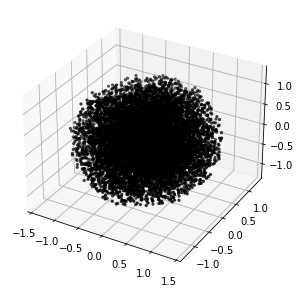

PCA eigenvalues: [0.11766272745077758, 0.12054462470734903, 0.12308991182426322, 0.12432603313695503, 0.12614936206387325, 0.12660364458813192, 0.1304972360390153, 0.13112646018963484]
----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [0.002515534621807089, 0.002563091926079283, 0.002685591870796911, 0.002712778881743521]
Eigengap #5: 1.0089138718044055


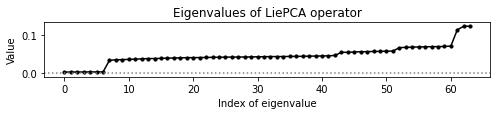

----> Optimization problem via Stiefel for SU(2) group <----
Solve minimization problem... It 1/1. Duration 0:15:40 Expected remaining time 0:00:00.
The optimal frequencies found is (4, 4) with cost 2.601771280233149e-05
Frequencies (4, 4) - score 3e-05 (best cost #1/1)
Non-symmetric Hausdorff distance from X to estimated orbit: 1.9917
Non-symmetric Hausdorff distance from estimated orbit to X: 0.592


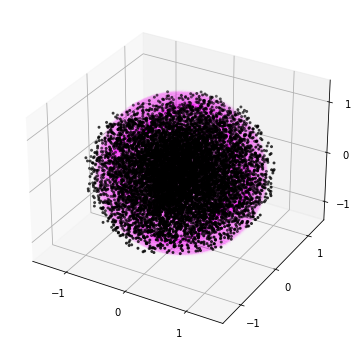

In [27]:
''' Algorithm with SU(2) on the Stiefel manifold V(2,4) embedded in R^8 '''

# Parameters
ambient_dim = 8     # ambient dimension
group = 'SU(2)'     # Lie group considered
dim = 3             # dimension of the group
n_points = 10000    # number of sample points

# Sample on Stiefel manifold and plot
X = np.random.multivariate_normal([0]*ambient_dim, cov = np.eye(ambient_dim), size=n_points)
X = [x.reshape((4,2)) for x in X]
X = [x @ scipy.linalg.sqrtm(np.linalg.inv(x.T @ x)) for x in X]
X = np.array([x.flatten() for x in X])
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5,5)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black',s=5); plt.show();

# Print PCA eigenvalues
pca = sklearn.decomposition.PCA(n_components=ambient_dim); pca.fit(X)
print('PCA eigenvalues:', sorted(pca.explained_variance_ratio_))

' Lie-PCA  '

n_neighbors = 50
dim_orbit = 5
method='localPCA'
Sigma = GetLiePCAOperator(X,n_neighbors,dim=dim_orbit,method=method,verbose=True)

# Plot Lie-PCA operator
vals = np.sort(np.real(np.linalg.eig(Sigma)[0])) #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(8,1)); ax = fig.add_subplot()
ax.plot(range(len(vals)),vals,c='black'); ax.scatter(range(len(vals)), vals,c='black', s=10); 
ax.axhline(0,color='grey',linestyle='dotted'); 
ax.set_ylim((0-0.01,max(vals)+0.01)); ax.set_title('Eigenvalues of LiePCA operator');
ax.set_xlabel('Index of eigenvalue'); ax.set_ylabel('Value'); 
plt.show();

' LieDetect '

# Find frequencies
method = 'Stiefel'
OptimalFrequencies, OptimalLieAlgebra = FindClosestLieAlgebra('SU(2)',Sigma,dim,ambient_dim,method=method,
                                                              FrequenciesToTest=[(4,4)],
                                                              verbosity=2)

' Plot orbit '

# Generate estimated orbit
n_points_orbit = 50
x = X[0,:] #initial point of X
Orbit = GenerateOrbitSU2(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x)

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff,4))
Hausdorff = scipy.spatial.distance.directed_hausdorff(Orbit, X)[0]
print('Non-symmetric Hausdorff distance from estimated orbit to X:', round(Hausdorff,4))

# Plot orbit
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5,5)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black', s=4);
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta',lw=0.5, alpha=0.01,marker="3");
plt.locator_params(nbins=4)
plt.tight_layout(); plt.show(); fig.savefig('Figures/Example_V24_R8.png',dpi=fig.dpi,bbox_inches='tight');

In [29]:
' Compute full orbit '

AllHausdorffDistance = []
n_points_orbit = 20

start_time = ChronometerStart('Generate orbits... ')
for x in X:
    Orbit = GenerateOrbitSU2(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x)
    Hausdorff = scipy.spatial.distance.directed_hausdorff(Orbit, X)[0]
    AllHausdorffDistance.append(Hausdorff)
ChronometerStop(start_time,'s')

print('Maximal non-symmetric Hausdorff distance from estimated orbit to X:', round(max(AllHausdorffDistance),4))

Generate orbits... Execution time: 3372 s.
Maximal non-symmetric Hausdorff distance from estimated orbit to X: 0.6545


## Example 4.13

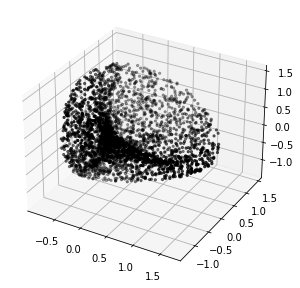

PCA eigenvalues: [0.10373837018031307, 0.10489941567689512, 0.10866510288615679, 0.10893717039247366, 0.11212280705267824, 0.11251864686774776, 0.11553928459348832, 0.11631768700317352, 0.11726151534707355]
----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [0.0008788984081192308, 0.0008867314321621735, 0.0009845663059596273, 0.0009957438175788038]
Eigengap #3: 1.0113527261206468


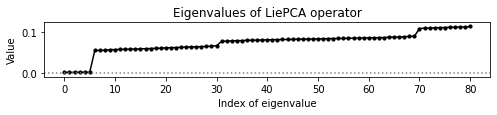

----> Optimization problem via Stiefel for SU(2) group <----
Solve minimization problem... It 12/12. Duration 3:02:40 Expected remaining time 0:00:00.
The optimal frequencies found is (1, 3, 5) with cost 5.698953880856481e-06
Frequencies (1, 3, 5) - score 1e-05 (best cost #1/12)
Frequencies (3, 3, 3) - score 1e-05 (best cost #2/12)
Frequencies (4, 5) - score 0.00128 (best cost #3/12)
Frequencies (1, 8) - score 0.00196 (best cost #4/12)
Frequencies (1, 1, 1, 1, 5) - score 0.00316 (best cost #5/12)
Frequencies (1, 1, 7) - score 0.00419 (best cost #6/12)
Frequencies (9,) - score 0.00432 (best cost #7/12)
Frequencies (1, 1, 1, 3, 3) - score 0.00696 (best cost #8/12)
Frequencies (1, 1, 3, 4) - score 0.008 (best cost #9/12)
Frequencies (1, 4, 4) - score 0.0099 (best cost #10/12)
Frequencies (1, 1, 1, 1, 1, 1, 3) - score 0.01203 (best cost #11/12)
Frequencies (1, 1, 1, 1, 1, 4) - score 0.01376 (best cost #12/12)
----> The frequencies [11] and (1, 3, 5) are not equivalent <----
Non-symmetric H

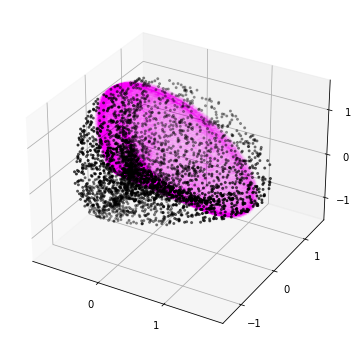

In [30]:
''' Algorithm with SU(2) on SO(3) embedded in R^9 '''

# Parameters
ambient_dim = 9     # ambient dimension
group = 'SU(2)'     # Lie group considered
dim = 3             # dimension of the group
n_points = 3000     # number of sample points

# Sample on SO(3)
X = np.array([scipy.stats.special_ortho_group.rvs(dim=3).flatten() for i in range(n_points)])
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5,5)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black',s=5); plt.show();

# Print PCA eigenvalues
pca = sklearn.decomposition.PCA(n_components=ambient_dim); pca.fit(X)
print('PCA eigenvalues:', sorted(pca.explained_variance_ratio_))

' Lie-PCA  '

n_neighbors = 50
method='localPCA'
Sigma = GetLiePCAOperator(X,n_neighbors,dim=dim,method=method,verbose=True)

# Plot Lie-PCA operator
vals = np.sort(np.real(np.linalg.eig(Sigma)[0])) #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(8,1)); ax = fig.add_subplot()
ax.plot(range(len(vals)),vals,c='black'); ax.scatter(range(len(vals)), vals,c='black', s=10); 
ax.axhline(0,color='grey',linestyle='dotted'); 
ax.set_ylim((0-0.01,max(vals)+0.01)); ax.set_title('Eigenvalues of LiePCA operator');
ax.set_xlabel('Index of eigenvalue'); ax.set_ylabel('Value'); 
plt.show();

' LieDetect '

# Find frequencies
method = 'Stiefel'
OptimalFrequencies, OptimalLieAlgebra = FindClosestLieAlgebra('SU(2)',Sigma,dim,ambient_dim,method=method,verbosity=2)

# Check if found frequencies are correct
AreFrequencesEquivalent(Frequencies,OptimalFrequencies,verbose=True)

' Plot orbit '

# Generate estimated orbit
n_points_orbit = 50
x = X[0,:] #initial point of X
Orbit = GenerateOrbitSU2(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x)

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff,4))
Hausdorff = scipy.spatial.distance.directed_hausdorff(Orbit, X)[0]
print('Non-symmetric Hausdorff distance from estimated orbit to X:', round(Hausdorff,4))

# Plot orbit
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5,5)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black', s=4);
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta',lw=0.5, alpha=0.01,marker="3");
plt.locator_params(nbins=4)
plt.tight_layout(); plt.show(); fig.savefig('Figures/Example_SO3_R9_35.png',dpi=fig.dpi,bbox_inches='tight');

----> Optimization problem via Stiefel for SU(2) group <----
Solve minimization problem... It 1/1. Duration 0:01:05 Expected remaining time 0:00:00.
The optimal frequencies found is (3, 3, 3) with cost 5.795977611191535e-06
Frequencies (3, 3, 3) - score 1e-05 (best cost #1/1)
----> The frequencies [11] and (3, 3, 3) are not equivalent <----
Non-symmetric Hausdorff distance from X to estimated orbit: 0.1007
Non-symmetric Hausdorff distance from estimated orbit to X: 0.6082


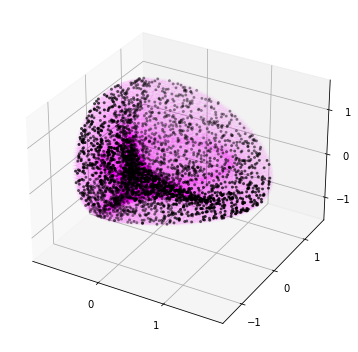

In [31]:
''' Test with other representation [3,3,3] '''

' LieDetect '

# Find frequencies
method = 'Stiefel'
OptimalFrequencies, OptimalLieAlgebra = FindClosestLieAlgebra('SU(2)',Sigma,dim,ambient_dim,
                                                              FrequenciesToTest=[(3,3,3)],method=method,verbosity=2)

# Check if found frequencies are correct
AreFrequencesEquivalent(Frequencies,OptimalFrequencies,verbose=True)

' Plot orbit '

# Generate estimated orbit
n_points_orbit = 50
x = X[0,:] #initial point of X
Orbit = GenerateOrbitSU2(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x)

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff,4))
Hausdorff = scipy.spatial.distance.directed_hausdorff(Orbit, X)[0]
print('Non-symmetric Hausdorff distance from estimated orbit to X:', round(Hausdorff,4))

# Plot orbit
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5,5)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black', s=4);
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta',lw=0.5, alpha=0.01,marker="3");
plt.locator_params(nbins=4)
plt.tight_layout(); plt.show(); fig.savefig('Figures/Example_SO3_R9_333.png',dpi=fig.dpi,bbox_inches='tight');

## Example 4.14

Shape of X: (5000, 16)


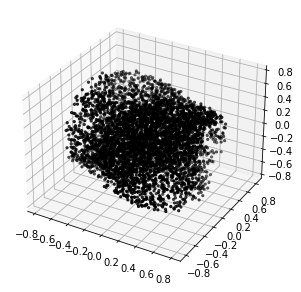

PCA eigenvalues: [1.683587477537404e-35, 9.179646822315521e-35, 2.4519856650011065e-34, 1.7593803749505584e-33, 2.4179729537728935e-33, 1.1616530533439264e-32, 6.332729825849775e-30, 0.10547303944731737, 0.10623474473870283, 0.10767392719752025, 0.10907614484586074, 0.11088814599023814, 0.11336895414004397, 0.11451764290325937, 0.11525015906240561, 0.11751724167465172]
Projection in dimension 9 - PCA eigenvalues: [1.683587477537404e-35, 9.179646822315521e-35, 2.4519856650011065e-34, 1.7593803749505584e-33, 2.4179729537728935e-33, 1.1616530533439264e-32, 6.332729825849775e-30, 0.10547303944731737, 0.10623474473870283, 0.10767392719752025, 0.10907614484586074, 0.11088814599023814, 0.11336895414004397, 0.11451764290325937, 0.11525015906240561, 0.11751724167465172]


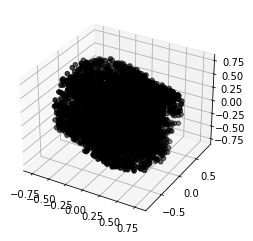

----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [0.002379353314683941, 0.002461578988413298, 0.002506718658852689, 0.002562434181047883]
Eigengap #4: 1.0445495351072525


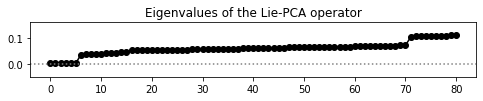

----> Optimization problem via Stiefel for SU(2) group <----
Solve minimization problem... It 2/2. Duration 0:02:36 Expected remaining time 0:00:00.
The optimal frequencies found is (1, 3, 5) with cost 2.3022688866935307e-05
Frequencies (1, 3, 5) - score 2e-05 (best cost #1/2)
Frequencies (3, 3, 3) - score 2e-05 (best cost #2/2)
Non-symmetric Hausdorff distance from X to estimated orbit: 1.0155
Non-symmetric Hausdorff distance from estimated orbit to X: 0.4438


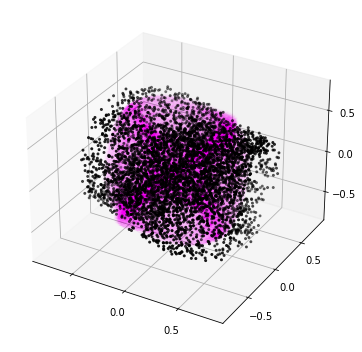

In [32]:
''' Algorithm with SU(2) on the Grassmann manifold G(2,4) embedded in R^16 '''

# Parameters
ambient_dim = 16    # ambient dimension
group = 'SU(2)'     # Lie group considered
dim = 3             # dimension of the group
n_points = 5000     # number of sample points

# Sample on Grassmann manifold and plot
X = np.random.multivariate_normal([0]*8, cov = np.eye(8), size=n_points)
X = [x.reshape((4,2)) for x in X]
X = [x @ scipy.linalg.sqrtm(np.linalg.inv(x.T @ x)) for x in X]  # Gram-Schmidt
X = [np.outer(x[:,0],x[:,0])+np.outer(x[:,1],x[:,1]) for x in X] # Projection
X = np.array([x.flatten() for x in X])
print('Shape of X:', np.shape(X))
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5,5)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black',s=5); plt.show();

# Prune small PCA eigenvalues
eps_pca = 1e-10
pca = sklearn.decomposition.PCA(n_components=ambient_dim); pca.fit(X)
print('PCA eigenvalues:', sorted(pca.explained_variance_ratio_))
dim_pca = sum(pca.explained_variance_ratio_>eps_pca)

if dim_pca<ambient_dim:
    print('Projection in dimension', dim_pca, '- PCA eigenvalues:', sorted(pca.explained_variance_ratio_))
    # Dimension reduction via PCA
    pca = sklearn.decomposition.PCA(n_components=dim_pca); 
    X = pca.fit_transform(X)
    ambient_dim = dim_pca

    # Plot new orbit
    pca = sklearn.decomposition.PCA(n_components=3)
    Xpca = pca.fit_transform(X)
    fig = plt.figure(figsize=(4,4)); ax = fig.add_subplot(projection='3d')
    ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black'); plt.show();

' Lie-PCA '

n_neighbors = 50
dim_orbit = 4
method='localPCA'
Sigma = GetLiePCAOperator(X,n_neighbors,dim=dim_orbit,method=method)

# Plot Lie-PCA operator
vals, vecs = np.linalg.eig(Sigma); vals = np.sort(np.real(vals))
fig = plt.figure(figsize=(8,1)); ax = fig.add_subplot()
ax.plot(range(len(vals)),vals,c='black'); ax.scatter(range(len(vals)), vals,c='black'); 
ax.axhline(0,color='grey',linestyle='dotted'); 
ax.set_ylim((0-0.05,max(vals)+0.05)); ax.set_title('Eigenvalues of the Lie-PCA operator'); plt.show();

' Project on Lie subalgebras '

method = 'Stiefel'
# Find frequencies
FrequenciesToTest = [tuple([3,3,3]),tuple([1,3,5])]
OptimalFrequencies, OptimalLieAlgebra = FindClosestLieAlgebra('SU(2)',Sigma,dim,ambient_dim,frequency_max=None,
                                                              method=method,verbosity=2,
                                                              FrequenciesToTest=FrequenciesToTest)

' Plot orbit '

# Generate estimated orbit
n_points_orbit = 50
x = X[0,:] #initial point of X
Orbit = GenerateOrbitSU2(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x)

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff,4))
Hausdorff = scipy.spatial.distance.directed_hausdorff(Orbit, X)[0]
print('Non-symmetric Hausdorff distance from estimated orbit to X:', round(Hausdorff,4))

# Plot orbit
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5,5)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black', s=4);
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta',lw=0.5, alpha=0.01,marker="3");
plt.locator_params(nbins=4)
plt.tight_layout(); plt.show(); fig.savefig('Figures/Example_G24_R16.png',dpi=fig.dpi,bbox_inches='tight');

In [33]:
' Compute full orbit '

AllHausdorffDistance = []
n_points_orbit = 20

start_time = ChronometerStart('Generate orbits... ')
for x in X:
    Orbit = GenerateOrbitSU2(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x)
    Hausdorff = scipy.spatial.distance.directed_hausdorff(Orbit, X)[0]
    AllHausdorffDistance.append(Hausdorff)
ChronometerStop(start_time,'s')

print('Maximal non-symmetric Hausdorff distance from estimated orbit to X:', round(max(AllHausdorffDistance),4))

Generate orbits... Execution time: 1995 s.
Maximal non-symmetric Hausdorff distance from estimated orbit to X: 0.4532


# Section 4.4.1: Application of the algorithm for a list of groups

## Example 4.15, dimension 6

-----> Representation of SU(2) in R^6 with partition [1, 5]


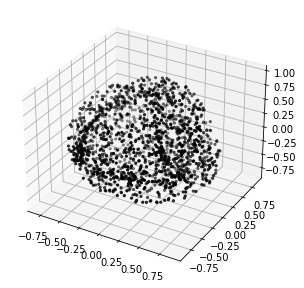

----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [0.009142572893253908, 0.010397838277431695, 0.011409592192515581, 0.03793233875286376]
Eigengap #3: 3.3246007493367262


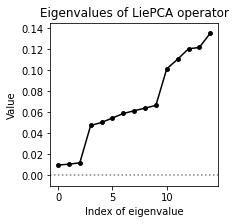

In [34]:
' Generate dataset '

# Parameters
ambient_dim = 6     # ambient dimension
group = 'SU(2)'     # Lie group considered
dim = 3             # dimension of the group
n_points = 1500     # number of sample points

# Generate dataset and plot
X, LieAlgebra, Frequencies = SampleOnSU2(ambient_dim=ambient_dim, n_points=n_points, frequencies=[1,5],verbose=True)
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5,5)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black',s=5); plt.show();

' Lie-PCA on skew-symmetric matrices '

n_neighbors = 30
method = 'localPCA'
Sigma = GetLiePCAOperator(X,n_neighbors,dim=dim,method=method)

# Define Lie-PCA operator on skew-symmetric matrices
Basis = []
for i in range(ambient_dim):
    for j in range(i+1,ambient_dim):
        A = np.zeros((ambient_dim,ambient_dim))
        A[i,j], A[j,i] = 1, -1
        Basis.append(A)        
SigmaSkew = [Sigma @ A.flatten() for A in Basis]
SigmaSkew = [A.reshape((ambient_dim,ambient_dim)) for A in SigmaSkew]
SigmaSkew = [SkewSymmetricToVector((A-A.T)/2) for A in SigmaSkew]
SigmaSkew = np.array(SigmaSkew)

# Plot Lie-PCA operator
vals = np.sort(np.real(np.linalg.eig(SigmaSkew)[0])) #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(3,3)); ax = fig.add_subplot()
ax.plot(range(len(vals)),vals,c='black'); ax.scatter(range(len(vals)), vals,c='black', s=15); 
ax.axhline(0,color='grey',linestyle='dotted'); 
ax.set_ylim((0-0.01,max(vals)+0.01)); ax.set_title('Eigenvalues of LiePCA operator');
ax.set_xlabel('Index of eigenvalue'); ax.set_ylabel('Value'); 
plt.show(); fig.savefig('Figures/distinguish_LiePCA.png',dpi=fig.dpi,bbox_inches='tight');

----> Optimization problem via NormalForm for torus group <----
Number of frequencies to test: 29
The optimal frequencies found is ((0, 1, 1), (0, 1, 0), (1, 0, 0)) with cost 1.9229626863835638e-16
Non-symmetric Hausdorff distance from X to estimated orbit: 0.9581


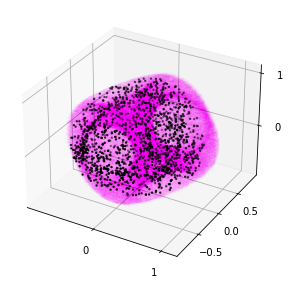

In [35]:
' Project on Lie subalgebras -T3 '

# Find frequencies
method = 'NormalForm'
OptimalFrequencies, OptimalLieAlgebra = FindClosestLieAlgebra('torus', Sigma,dim,ambient_dim,frequency_max=1,method=method,verbosity=1)

# Generate estimated orbit
n_points_orbit = 50
x = X[0,:] #initial point of X
Orbit = GenerateOrbitTorus(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x, method='random')

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff,4))

# Plot orbit
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(4,4)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black', s=2);
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta',lw=0.5, alpha=0.01,marker="3");
plt.locator_params(nbins=4)
plt.tight_layout(); plt.show(); fig.savefig('Figures/distinguish_T3.png',dpi=fig.dpi,bbox_inches='tight');

----> Optimization problem via Stiefel for SU(2) group <----
Solve minimization problem... It 1/1. Duration 0:00:13 Expected remaining time 0:00:00.
The optimal frequencies found is (1, 5) with cost 0.00044519784629450956
Frequencies (1, 5) - score 0.00045 (best cost #1/1)
Non-symmetric Hausdorff distance from X to estimated orbit: 0.083


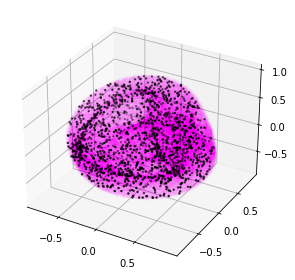

In [36]:
' Project on Lie subalgebras - SU(2) '

method = 'Stiefel'
OptimalFrequencies, OptimalLieAlgebra = FindClosestLieAlgebra('SU(2)',Sigma,dim,ambient_dim,method=method,
                                                              FrequenciesToTest=[(1,5)], verbosity=2)

# Generate estimated orbit
n_points_orbit = 50
x = X[0,:] #initial point of X
Orbit = GenerateOrbitSU2(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x)

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff,4))

# Plot orbit
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(4,4)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black', s=2);
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta',lw=0.5, alpha=0.01,marker="3");
plt.locator_params(nbins=4)
plt.tight_layout(); plt.show(); fig.savefig('Figures/distinguish_SU2.png',dpi=fig.dpi,bbox_inches='tight');

## Example 4.15, dimension 8

-----> Representation of SU(2) in R^8 with partition [3, 5]


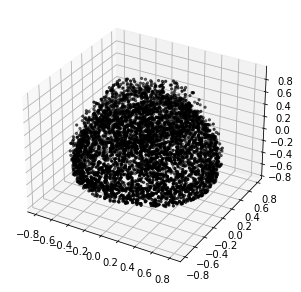

----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [0.0021794111538540038, 0.002487099448127195, 0.002605256229751, 0.04480323024601832]
Eigengap #3: 17.19724522078983


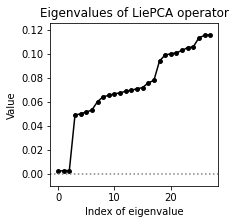

In [37]:
' Generate dataset '

# Parameters
ambient_dim = 8     # ambient dimension
group = 'SU(2)'     # Lie group considered
dim = 3             # dimension of the group
n_points = 5000     # number of sample points

# Generate dataset and plot
X, LieAlgebra, Frequencies = SampleOnSU2(ambient_dim=ambient_dim, n_points=n_points, frequencies=[3,5],verbose=True)
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5,5)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black',s=5); plt.show();

' Lie-PCA on skew-symmetric matrices '

n_neighbors = 30
method = 'localPCA'
Sigma = GetLiePCAOperator(X,n_neighbors,dim=dim,method=method)

# Define Lie-PCA operator on skew-symmetric matrices
Basis = []
for i in range(ambient_dim):
    for j in range(i+1,ambient_dim):
        A = np.zeros((ambient_dim,ambient_dim))
        A[i,j], A[j,i] = 1, -1
        Basis.append(A)        
SigmaSkew = [Sigma @ A.flatten() for A in Basis]
SigmaSkew = [A.reshape((ambient_dim,ambient_dim)) for A in SigmaSkew]
SigmaSkew = [SkewSymmetricToVector((A-A.T)/2) for A in SigmaSkew]
SigmaSkew = np.array(SigmaSkew)

# Plot Lie-PCA operator
vals = np.sort(np.real(np.linalg.eig(SigmaSkew)[0])) #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(3,3)); ax = fig.add_subplot()
ax.plot(range(len(vals)),vals,c='black'); ax.scatter(range(len(vals)), vals,c='black', s=15); 
ax.axhline(0,color='grey',linestyle='dotted'); 
ax.set_ylim((0-0.01,max(vals)+0.01)); ax.set_title('Eigenvalues of LiePCA operator');
ax.set_xlabel('Index of eigenvalue'); ax.set_ylabel('Value'); 
plt.show(); fig.savefig('Figures/distinguish_LiePCA_dim8.png',dpi=fig.dpi,bbox_inches='tight');

----> Optimization problem via NormalForm for torus group <----
Number of frequencies to test: 35
The optimal frequencies found is ((1, 0, 1, 0), (0, 0, 0, 1), (0, -1, 1, 0)) with cost 0.3789112144106006
Non-symmetric Hausdorff distance from X to estimated orbit: 1.214


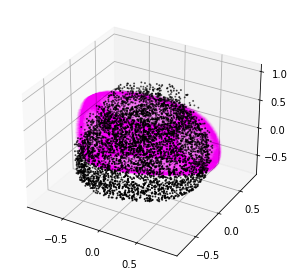

In [38]:
' Project on Lie subalgebras -T3 '

# Find frequencies
method = 'NormalForm'
OptimalFrequencies, OptimalLieAlgebra = FindClosestLieAlgebra('torus', Sigma,dim,ambient_dim,frequency_max=1,method=method,verbosity=1)

# Generate estimated orbit
n_points_orbit = 50
x = X[0,:] #initial point of X
Orbit = GenerateOrbitTorus(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x, method='random')

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff,4))

# Plot orbit
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(4,4)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black', s=1);
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta',lw=0.5, alpha=0.01,marker="3");
plt.locator_params(nbins=4)
plt.tight_layout(); plt.show(); fig.savefig('Figures/distinguish_T3_dim8.png',dpi=fig.dpi,bbox_inches='tight');

----> Optimization problem via Stiefel for SU(2) group <----
Solve minimization problem... It 1/1. Duration 0:01:39 Expected remaining time 0:00:00.
The optimal frequencies found is (3, 5) with cost 4.649433887160031e-05
Frequencies (3, 5) - score 5e-05 (best cost #1/1)
Non-symmetric Hausdorff distance from X to estimated orbit: 0.0871


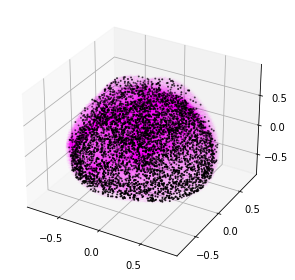

In [39]:
' Project on Lie subalgebras - SU(2) '

method = 'Stiefel'
OptimalFrequencies, OptimalLieAlgebra = FindClosestLieAlgebra('SU(2)',Sigma,dim,ambient_dim,method=method,
                                                              FrequenciesToTest=[(3,5)], verbosity=2)

# Generate estimated orbit
n_points_orbit = 50
x = X[0,:] #initial point of X
Orbit = GenerateOrbitSU2(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x)

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff,4))

# Plot orbit
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(4,4)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black', s=1);
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta',lw=0.5, alpha=0.01,marker="3");
plt.locator_params(nbins=4)
plt.tight_layout(); plt.show(); fig.savefig('Figures/distinguish_SU2_dim8.png',dpi=fig.dpi,bbox_inches='tight');

## Example 4.16

In [40]:
import gudhi

def SampleOnMobiusStrip(N_points_init, N_points_subsample):
    r = 1 #parameter 

    # Draw sample from uniform distribution
    Sample = []
    Angles = np.array([np.random.uniform(0,2*np.pi,N_points_init) for i in range(2)])
    for i in range(N_points_init): 
        theta, phi = Angles[:,i]
        s = np.array([np.cos(theta),np.sin(theta),r*np.cos(phi)*np.cos(theta/2),r*np.cos(phi)*np.sin(theta/2) ])
        Sample.append(s)

    # Subsample with gudhi    
    Sample = np.array(gudhi.subsampling.choose_n_farthest_points(points=Sample, nb_points = N_points_subsample))
    
    return Sample

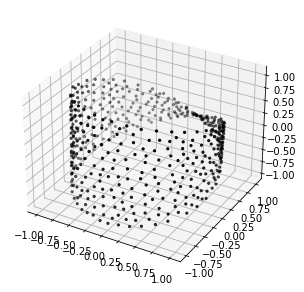

----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [0.00023791346707179633, 0.0004254623120377242, 0.053032201174254334, 0.05316478095520085]
Eigengap #2: 124.64606070572982


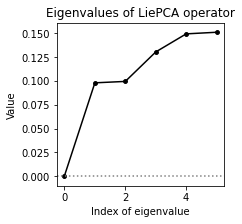

In [41]:
' Generate dataset '

dim = 2
ambient_dim = 4

# Generate sample
N_points_init, N_points_subsample = 10000, 500
X = SampleOnMobiusStrip(N_points_init, N_points_subsample)

# Plot
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5,5)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black',s=5); plt.show();

' Lie-PCA on skew-symmetric matrices '

n_neighbors = 15
method = 'localPCA'
Sigma = GetLiePCAOperator(X,n_neighbors,dim=dim,method=method)

# Define Lie-PCA operator on skew-symmetric matrices
Basis = []
for i in range(ambient_dim):
    for j in range(i+1,ambient_dim):
        A = np.zeros((ambient_dim,ambient_dim))
        A[i,j], A[j,i] = 1, -1
        Basis.append(A)        
SigmaSkew = [Sigma @ A.flatten() for A in Basis]
SigmaSkew = [A.reshape((ambient_dim,ambient_dim)) for A in SigmaSkew]
SigmaSkew = [SkewSymmetricToVector((A-A.T)/2) for A in SigmaSkew]
SigmaSkew = np.array(SigmaSkew)

# Plot Lie-PCA operator
vals = np.sort(np.real(np.linalg.eig(SigmaSkew)[0])) #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(3,3)); ax = fig.add_subplot()
ax.plot(range(len(vals)),vals,c='black'); ax.scatter(range(len(vals)), vals,c='black', s=15); 
ax.axhline(0,color='grey',linestyle='dotted'); 
ax.set_ylim((0-0.01,max(vals)+0.01)); ax.set_title('Eigenvalues of LiePCA operator');
ax.set_xlabel('Index of eigenvalue'); ax.set_ylabel('Value'); 
plt.show(); fig.savefig('Figures/Mobius_LiePCA.png',dpi=fig.dpi,bbox_inches='tight');

----> Optimization problem via NormalForm for torus group <----
Number of frequencies to test: 25
The optimal frequencies found is ((1, 2), (1, 0)) with cost 4.0460356557118357e-16
Non-symmetric Hausdorff distance from X to estimated orbit: 1.7249


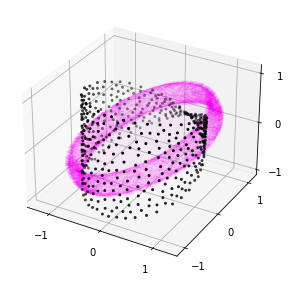

In [42]:
' LieDetect - T^2 '

# Find frequencies
dim = 2 # dimension of the torus
ambient_dim = 4
method = 'NormalForm'
frequency_max = 2
OptimalFrequencies, OptimalLieAlgebra = FindClosestLieAlgebra('torus',Sigma,dim,ambient_dim,frequency_max=frequency_max,
                                                              method=method,verbosity=1)

' Plot orbit '

# Generate estimated orbit
n_points_orbit = 100
x = X[0,:] #initial point of X
Orbit = GenerateOrbitTorus(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x, method='random')

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff,4))

# Plot orbit
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(4,4)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black', s=4);
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta',lw=0.5, alpha=0.05,marker="3");
plt.locator_params(nbins=4)
plt.tight_layout(); plt.show(); fig.savefig('Figures/Mobius_T2.png',dpi=fig.dpi,bbox_inches='tight');

----> Optimization problem via NormalForm for torus group <----
Number of frequencies to test: 1
The optimal frequencies found is ((1, 2),) with cost 0.012118087892987899
Non-symmetric Hausdorff distance from X to estimated orbit: 0.8384
Non-symmetric Hausdorff distance from estimated orbit to X: 0.1285


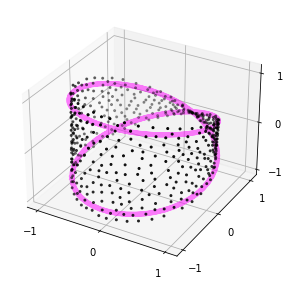

In [43]:
' LieDetect - SO(2) '

# Find frequencies
dim = 1 
ambient_dim = 4
method = 'NormalForm'
frequency_max = 2
OptimalFrequencies, OptimalLieAlgebra = FindClosestLieAlgebra('torus',Sigma,dim,ambient_dim,frequency_max=frequency_max,
                                                              method=method,verbosity=1)

' Plot orbit '

# Generate estimated orbit
n_points_orbit = 100
x = X[0,:] #initial point of X
Orbit = GenerateOrbitTorus(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x, method='uniform')

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff,4))
Hausdorff = scipy.spatial.distance.directed_hausdorff(Orbit,X)[0]
print('Non-symmetric Hausdorff distance from estimated orbit to X:', round(Hausdorff,4))

# Plot orbit
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(4,4)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black', s=4);
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta',lw=5,alpha=0.5); 
plt.locator_params(nbins=4)
plt.tight_layout(); plt.show(); fig.savefig('Figures/Mobius_SO2.png',dpi=fig.dpi,bbox_inches='tight');

# Section 4.4.2: Typical distance between orbits

In [44]:
ambient_dim_max = 10

In [45]:
' SO(2) '

# Parameters
dim = 1               # dimension of the torus (here, circle)
n_points = 500        # number of sample points

Distances_SO2_sym = []
Distances_SO2_nonsym = []
for ambient_dim in range(4,ambient_dim_max+1,2):
    print('Ambient dim', ambient_dim, end=' - ')
    
    # Define origin Euclidean vector x
    x = np.zeros((ambient_dim,1))
    for i in range(int(ambient_dim/2)): x[2*i,0] = 1
    x /= np.linalg.norm(x)
    x = x[:,0]

    # Get frequencies to test
    frequency_max = ambient_dim
    # frequency_max = int(ambient_dim/2)+4
    FrequenciesToTest = GetFrequenciesToTest(dim, ambient_dim, frequency_max=frequency_max, verbose=0)
    print('Frequencies found:', len(FrequenciesToTest), end=' - ')

    # Generate orbits
    Orbits = list()
    for frequencies in FrequenciesToTest:
            LieAlgebra = GetCanonicalLieAlgebraTorus(frequencies)           
            # LieAlgebra = GramSchmidtOrthonormalizationMatrices(LieAlgebra)
            Orbit = GenerateOrbitTorus(LieAlgebra, frequencies, n_points, x, method='uniform')
            Orbits.append(Orbit)
    print('Orbits found', end=' - ')
    
    # Compute Hausdorff distances
    Distances_sym = list()
    Distances_nonsym = list()
    for i in range(len(FrequenciesToTest)):
        for j in range(i+1, len(FrequenciesToTest)):
            Dij = scipy.spatial.distance.directed_hausdorff(Orbits[i], Orbits[j])[0]
            Dji = scipy.spatial.distance.directed_hausdorff(Orbits[j], Orbits[i])[0]
            # Distances[i,j] = max(Dij,Dji)
            Distances_sym.append(max(Dij,Dji))
            Distances_nonsym.append(min(Dij,Dji))
    print('Distances found', end=' \n')

    Distances_SO2_sym.append([ambient_dim, min(Distances_sym)])
    Distances_SO2_nonsym.append([ambient_dim, min(Distances_nonsym)])

' T2 '

# Parameters
dim = 2               # dimension of the torus
n_points = 35         # number of sample points
method='exact'
frequency_max = 2

Distances_T2_sym = []
Distances_T2_nonsym = []
for ambient_dim in range(6,ambient_dim_max+1,2):
    print('Ambient dim', ambient_dim, end=' - ')
    
    # Define origin Euclidean vector x
    x = np.zeros((ambient_dim,1))
    for i in range(int(ambient_dim/2)): x[2*i,0] = 1
    x /= np.linalg.norm(x)
    x = x[:,0]

    # Get frequencies to test
    FrequenciesToTest = GetPrimitiveLattices(dim, ambient_dim, frequency_max, method=method, verbose=0)
    print('Frequencies found:', len(FrequenciesToTest), end=' - ')

    # Generate orbits
    Orbits = list()
    for frequencies in FrequenciesToTest:
            LieAlgebra = GetCanonicalLieAlgebraTorus(frequencies)           
            LieAlgebra = GramSchmidtOrthonormalizationMatrices(LieAlgebra)
            Orbit = GenerateOrbitTorus(LieAlgebra, frequencies, n_points, x, method='uniform')
            Orbits.append(Orbit)
    print('Orbits found', end=' - ')
    
    # Compute Hausdorff distances
    Distances_sym = list()
    Distances_nonsym = list()
    for i in range(len(FrequenciesToTest)):
        for j in range(i+1, len(FrequenciesToTest)):
            Dij = scipy.spatial.distance.directed_hausdorff(Orbits[i], Orbits[j])[0]
            Dji = scipy.spatial.distance.directed_hausdorff(Orbits[j], Orbits[i])[0]
            Distances_sym.append(max(Dij,Dji))
            Distances_nonsym.append(min(Dij,Dji))
    print('Distances found', end=' \n')

    Distances_T2_sym.append([ambient_dim, min(Distances_sym)])
    Distances_T2_nonsym.append([ambient_dim, min(Distances_nonsym)])

' T3 '

# Parameters
dim = 3               # dimension of the torus 
n_points = 30         # number of sample points
method='exact'
frequency_max = 1

Distances_T3_sym = []
Distances_T3_nonsym = []
for ambient_dim in range(8,ambient_dim_max+1,2):
    print('Ambient dim', ambient_dim, end=' - ')
    
    # Define origin Euclidean vector x
    x = np.zeros((ambient_dim,1))
    for i in range(int(ambient_dim/2)): x[2*i,0] = 1
    x /= np.linalg.norm(x)
    x = x[:,0]

    # Get frequencies to test
    FrequenciesToTest = GetPrimitiveLattices(dim, ambient_dim, frequency_max, method=method, verbose=0)
    print('Frequencies found:', len(FrequenciesToTest), end=' - ')

    # Generate orbits
    Orbits = list()
    for frequencies in FrequenciesToTest:
            LieAlgebra = GetCanonicalLieAlgebraTorus(frequencies)           
            LieAlgebra = GramSchmidtOrthonormalizationMatrices(LieAlgebra)
            Orbit = GenerateOrbitTorus(LieAlgebra, frequencies, n_points, x, method='uniform')
            Orbits.append(Orbit)
    print('Orbits found', end=' - ')
    
    # Compute Hausdorff distances
    Distances_sym = list()
    Distances_nonsym = list()
    for i in range(len(FrequenciesToTest)):
        for j in range(i+1, len(FrequenciesToTest)):
            Dij = scipy.spatial.distance.directed_hausdorff(Orbits[i], Orbits[j])[0]
            Dji = scipy.spatial.distance.directed_hausdorff(Orbits[j], Orbits[i])[0]
            Distances_sym.append(max(Dij,Dji))
            Distances_nonsym.append(min(Dij,Dji))
    print('Distances found', end=' \n')

    Distances_T3_sym.append([ambient_dim, min(Distances_sym)])
    Distances_T3_nonsym.append([ambient_dim, min(Distances_nonsym)])

' SU(2) '
    
# Parameters
group = 'SU(2)'     # Lie group considered
dim = 3             # dimension of the group
dim_orbit = 3       # dimension of the orbit
n_points = 30       # number of sample points

Distances_SU2_sym = []
Distances_SU2_nonsym = []
for ambient_dim in range(4,ambient_dim_max+2):
    print('Ambient dim', ambient_dim, end=' - ')
    
    # Define origin Euclidean vector x
    x = np.zeros((ambient_dim,1))
    for i in range(int(ambient_dim/2)): x[2*i,0] = 1
    x /= np.linalg.norm(x)
    x = x[:,0]

    # Get frequencies to test
    FrequenciesToTest = partition_su2(ambient_dim)
    FrequenciesToTest = [f for f in FrequenciesToTest if len(np.unique(f))==len(f) and 1 not in f]
    print('Frequencies found:', len(FrequenciesToTest), end=' - ')

    if len(FrequenciesToTest)>1:
        # Generate orbits
        Orbits = list()
        for frequencies in FrequenciesToTest:
                LieAlgebra = GetCanonicalLieAlgebraSU2(frequencies)
                Orbit = GenerateOrbitSU2(LieAlgebra, frequencies, n_points, x, coefficient=8*np.pi)
                Orbits.append(Orbit)
        print('Orbits found', end=' - ')
        
        # Compute Hausdorff distances
        Distances_sym = list()
        Distances_nonsym = list()
        for i in range(len(FrequenciesToTest)):
            for j in range(i+1, len(FrequenciesToTest)):
                Dij = scipy.spatial.distance.directed_hausdorff(Orbits[i], Orbits[j])[0]
                Dji = scipy.spatial.distance.directed_hausdorff(Orbits[j], Orbits[i])[0]
                Distances_sym.append(max(Dij,Dji))
                Distances_nonsym.append(min(Dij,Dji))
        print('Distances found', end=' \n')
        Distances_SU2_sym.append([ambient_dim, min(Distances_sym)])
        Distances_SU2_nonsym.append([ambient_dim, min(Distances_nonsym)])
    else:
        print('')

Ambient dim 4 - Frequencies found: 5 - Orbits found - Distances found 
Ambient dim 6 - Frequencies found: 19 - Orbits found - Distances found 
Ambient dim 8 - Frequencies found: 69 - Orbits found - Distances found 
Ambient dim 10 - Frequencies found: 251 - Orbits found - Distances found 
Ambient dim 6 - Frequencies found: 9 - Orbits found - Distances found 
Ambient dim 8 - Frequencies found: 19 - Orbits found - Distances found 
Ambient dim 10 - Frequencies found: 21 - Orbits found - Distances found 
Ambient dim 8 - Frequencies found: 3 - Orbits found - Distances found 
Ambient dim 10 - Frequencies found: 2 - Orbits found - Distances found 
Ambient dim 4 - Frequencies found: 1 - 
Ambient dim 5 - Frequencies found: 1 - 
Ambient dim 6 - Frequencies found: 0 - 
Ambient dim 7 - Frequencies found: 2 - Orbits found - Distances found 
Ambient dim 8 - Frequencies found: 2 - Orbits found - Distances found 
Ambient dim 9 - Frequencies found: 2 - Orbits found - Distances found 
Ambient dim 10 - Fr

minima symmetric: 0.4169571342144962


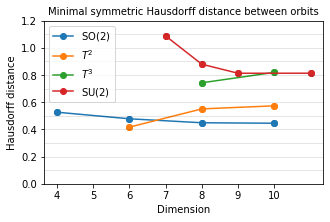

In [46]:
' Plot results - symmmetric Haudorff'

fig = plt.figure(figsize = (5,3))

minima = np.min(np.concatenate([np.array(Distances_SO2_sym)[:,1],np.array(Distances_T2_sym)[:,1],
                                np.array(Distances_T3_sym)[:,1],np.array(Distances_SU2_sym)[:,1]]))
# plt.axhline(minima,ls='dashed',c='black',alpha=0.5)
print('minima symmetric:', minima)

y = np.array(Distances_SO2_sym)
plt.scatter(y[:,0],y[:,1])
plt.plot(y[:,0],y[:,1], marker = "o", label= '$\mathrm{SO}(2)$')

y = np.array(Distances_T2_sym)
plt.scatter(y[:,0],y[:,1])
plt.plot(y[:,0],y[:,1], marker = "o", label= '$T^2$')

y = np.array(Distances_T3_sym)
plt.scatter(y[:,0],y[:,1])
plt.plot(y[:,0],y[:,1], marker = "o", label= '$T^3$')

y = np.array(Distances_SU2_sym)
plt.scatter(y[:,0],y[:,1])
plt.plot(y[:,0],y[:,1], marker = "o", label= '$\mathrm{SU}(2)$')

plt.title('Minimal symmetric Hausdorff distance between orbits', fontsize=10)
plt.xlabel('Dimension', fontsize=10); plt.ylabel('Hausdorff distance', fontsize=10); 
plt.xticks(range(4,ambient_dim_max+1));
plt.ylim(4,ambient_dim_max+2); plt.ylim(0,1.2)
plt.legend(loc="upper left");
for y in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1]: plt.axhline(y,c='black',alpha=0.1,lw=1)
fig.savefig('Figures/minimal_Hausdorff_symmetric.png',dpi=fig.dpi,bbox_inches='tight');

minima non-symmetric: 0.350479743576402


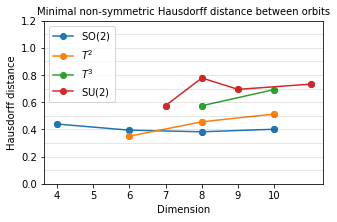

In [47]:
' Plot results - non-symmmetric Haudorff'

fig = plt.figure(figsize = (5,3))

minima = np.min(np.concatenate([np.array(Distances_SO2_nonsym)[:,1],np.array(Distances_T2_nonsym)[:,1],
                                np.array(Distances_T3_nonsym)[:,1],np.array(Distances_SU2_nonsym)[:,1]]))
# plt.axhline(minima,ls='dashed',c='black',alpha=0.5)
print('minima non-symmetric:', minima)

y = np.array(Distances_SO2_nonsym)
plt.scatter(y[:,0],y[:,1])
plt.plot(y[:,0],y[:,1], marker = "o", label= '$\mathrm{SO}(2)$')

y = np.array(Distances_T2_nonsym)
plt.scatter(y[:,0],y[:,1])
plt.plot(y[:,0],y[:,1], marker = "o", label= '$T^2$')

y = np.array(Distances_T3_nonsym)
plt.scatter(y[:,0],y[:,1])
plt.plot(y[:,0],y[:,1], marker = "o", label= '$T^3$')

y = np.array(Distances_SU2_nonsym)
plt.scatter(y[:,0],y[:,1])
plt.plot(y[:,0],y[:,1], marker = "o", label= '$\mathrm{SU}(2)$')

plt.title('Minimal non-symmetric Hausdorff distance between orbits', fontsize=10)
plt.xlabel('Dimension', fontsize=10); plt.ylabel('Hausdorff distance', fontsize=10); 
plt.xticks(range(4,ambient_dim_max+1));
plt.ylim(4,ambient_dim_max+2); plt.ylim(0,1.2)
plt.legend(loc="upper left");
for y in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1]: plt.axhline(y,c='black',alpha=0.1,lw=1)
fig.savefig('Figures/minimal_Hausdorff_nonsymmetric.png',dpi=fig.dpi,bbox_inches='tight');

# Section 4.4.3: Running time and convergence

In [48]:
ambient_dim_max = 10
number_tries = 100
number_tries_SU2 = 10

In [49]:
' SO(2) '

# Parameters
dim = 1               # dimension of the torus (here, circle)
n_points = 250        # number of sample points

Results_SO2 = []
print('SO(2)')
for ambient_dim in range(4,ambient_dim_max+1,2):
    print('Ambient dim', ambient_dim, end=' - ')

    frequency_max = ambient_dim
    FrequenciesToTest = GetFrequenciesToTest(dim=dim, ambient_dim=ambient_dim, frequency_max=frequency_max, verbose=False)

    for i in range(number_tries):
        X, LieAlgebra, Frequencies = SampleOnTorus(dim=dim, ambient_dim=ambient_dim, n_points=n_points, 
                                                   frequencies=random.choice(FrequenciesToTest),
                                                   conjugate=False, right_multiply=False, verbose=False)

        start_time = time.time()
    
        n_neighbors = 4
        method='localPCA'
        Sigma = GetLiePCAOperator(X,n_neighbors,dim=dim,method=method,correction=False,verbose=0)
        
        ' LieDetect '
        
        group, dim = 'torus', 1
        method_optim, frequency_max = 'NormalForm', frequency_max
        OptimalFrequencies, OptimalLieAlgebra = FindClosestLieAlgebra(group,Sigma,dim,ambient_dim,
                                                                      FrequenciesToTest=FrequenciesToTest,
                                                                      method=method_optim,verbosity=0)
    
        elapsed_time_secs = time.time() - start_time

        # success = AreFrequencesEquivalent(Frequencies,OptimalFrequencies,verbose=False) # Check if found frequencies are correct
        success = OptimalFrequencies==OptimalFrequencies # Check if found frequencies are correct
    
        Results_SO2.append([ambient_dim, success, elapsed_time_secs])

' T2 '

# Parameters
dim = 2               # dimension of the torus (here, circle)
n_points = 500        # number of sample points

Results_T2 = []
print('T2')
for ambient_dim in range(6,ambient_dim_max+1,2):
    print('Ambient dim', ambient_dim, end=' - ')

    frequency_max = 2
    if ambient_dim<12: FrequenciesToTest = GetPrimitiveLattices(dim, ambient_dim, frequency_max, method='exact', verbose=0)
    else :             FrequenciesToTest = GetPrimitiveLattices(dim, ambient_dim, frequency_max, method='repetitions', verbose=0)

    for i in range(number_tries):
        X, LieAlgebra, Frequencies = SampleOnTorus(dim=dim, ambient_dim=ambient_dim, n_points=n_points, 
                                                   frequencies=random.choice(FrequenciesToTest),
                                                   conjugate=False, right_multiply=False, verbose=False)

        start_time = time.time()
    
        n_neighbors = 20
        method='localPCA'
        Sigma = GetLiePCAOperator(X,n_neighbors,dim=dim,method=method,correction=False,verbose=0)
        
        ' LieDetect '
        
        group, dim = 'torus', 2
        method_optim, frequency_max = 'NormalForm', frequency_max
        OptimalFrequencies, OptimalLieAlgebra = FindClosestLieAlgebra(group,Sigma,dim,ambient_dim,
                                                                      FrequenciesToTest=FrequenciesToTest,
                                                                      method=method_optim,verbosity=0)
    
        elapsed_time_secs = time.time() - start_time

        success = AreFrequencesEquivalent(Frequencies,OptimalFrequencies,verbose=False) # Check if found frequencies are correct
        # success = OptimalFrequencies==Frequencies
    
        Results_T2.append([ambient_dim, success, elapsed_time_secs])

' T3 '

# Parameters
dim = 3                # dimension of the torus (here, circle)
n_points = 1000        # number of sample points

Results_T3 = []
print('T3')
for ambient_dim in range(8,ambient_dim_max+1,2):
    print('Ambient dim', ambient_dim, end=' - ')

    frequency_max = 1
    # if ambient_dim<12:  FrequenciesToTest = GetPrimitiveLattices(dim, ambient_dim, frequency_max, method='exact', verbose=0)
    # else :              FrequenciesToTest = GetPrimitiveLattices(dim, ambient_dim, frequency_max, method='repetitions', verbose=0)
    FrequenciesToTest = GetPrimitiveLattices(dim, ambient_dim, frequency_max, method='repetitions', verbose=0)
    
    for i in range(number_tries):
        X, LieAlgebra, Frequencies = SampleOnTorus(dim=dim, ambient_dim=ambient_dim, n_points=n_points, 
                                                   frequencies=random.choice(FrequenciesToTest),
                                                   conjugate=False, right_multiply=False, verbose=False)

        start_time = time.time()
    
        n_neighbors = 40
        method='localPCA'
        Sigma = GetLiePCAOperator(X,n_neighbors,dim=dim,method=method,correction=False,verbose=0)
        
        ' LieDetect '
        
        group, dim = 'torus', 3
        method_optim, frequency_max = 'NormalForm', frequency_max
        OptimalFrequencies, OptimalLieAlgebra = FindClosestLieAlgebra(group,Sigma,dim,ambient_dim,
                                                                      FrequenciesToTest=FrequenciesToTest,
                                                                      method=method_optim,verbosity=0)
    
        elapsed_time_secs = time.time() - start_time

        success = AreFrequencesEquivalent(Frequencies,OptimalFrequencies,verbose=False) # Check if found frequencies are correct
        # success = OptimalFrequencies==Frequencies
    
        Results_T3.append([ambient_dim, success, elapsed_time_secs])

' SU(2) - run once '

# Parameters
dim = 3               # dimension of the torus (here, circle)
n_points = 1000        # number of sample points

Results_SU2 = []
print('SU(2)')
for ambient_dim in range(4,ambient_dim_max+1,1):
    print('Ambient dim', ambient_dim, end=' - ')

    # Get frequencies to test
    FrequenciesToTest = partition_su2(ambient_dim)
    FrequenciesToTest = [tuple(f) for f in FrequenciesToTest if len(np.unique(f))==len(f) and 1 not in f]
    print('Frequencies found:', len(FrequenciesToTest), end=' - \n')

    if len(FrequenciesToTest)>0:
        for i in range(number_tries_SU2):
            X, LieAlgebra, Frequencies = SampleOnSU2(dim=dim, ambient_dim=ambient_dim, n_points=n_points, 
                                                       frequencies=random.choice(FrequenciesToTest),
                                                       conjugate=False, right_multiply=False, verbose=False)
    
            start_time = time.time()
        
            n_neighbors = 50
            method='localPCA'
            Sigma = GetLiePCAOperator(X,n_neighbors,dim=dim,method=method,correction=False,verbose=0)
            
            ' LieDetect '
            
            group, dim = 'SU(2)', 3
            method_optim, frequency_max = 'Stiefel', frequency_max
            OptimalFrequencies, OptimalLieAlgebra = FindClosestLieAlgebra(group,Sigma,dim,ambient_dim,
                                                                          FrequenciesToTest=FrequenciesToTest,
                                                                          method=method_optim,verbosity=1)
        
            elapsed_time_secs = time.time() - start_time
            success = Frequencies==OptimalFrequencies # Check if found frequencies are correct
            Results_SU2.append([ambient_dim, success, elapsed_time_secs,  elapsed_time_secs/len(FrequenciesToTest)])
    else:
        print('')

SO(2)
Ambient dim 4 - Ambient dim 6 - Ambient dim 8 - Ambient dim 10 - T2
Ambient dim 6 - Ambient dim 8 - Ambient dim 10 - T3
Ambient dim 8 - Ambient dim 10 - SU(2)
Ambient dim 4 - Frequencies found: 1 - 
----> Optimization problem via Stiefel for SU(2) group <----
Solve minimization problem... It 1/1. Duration 0:00:00 Expected remaining time 0:00:00.
The optimal frequencies found is (4,) with cost 7.369239215371555e-05
----> Optimization problem via Stiefel for SU(2) group <----
Solve minimization problem... It 1/1. Duration 0:00:00 Expected remaining time 0:00:00.
The optimal frequencies found is (4,) with cost 7.315496173920178e-05
----> Optimization problem via Stiefel for SU(2) group <----
Solve minimization problem... It 1/1. Duration 0:00:00 Expected remaining time 0:00:00.
The optimal frequencies found is (4,) with cost 8.309843860904898e-05
----> Optimization problem via Stiefel for SU(2) group <----
Solve minimization problem... It 1/1. Duration 0:00:00 Expected remaining tim

Solve minimization problem... It 2/2. Duration 0:02:47 Expected remaining time 0:00:00.
The optimal frequencies found is (3, 5) with cost 0.004108985227966546
----> Optimization problem via Stiefel for SU(2) group <----
Solve minimization problem... It 2/2. Duration 0:30:17 Expected remaining time 0:00:00.
The optimal frequencies found is (8,) with cost 0.004930270264420827
----> Optimization problem via Stiefel for SU(2) group <----
Solve minimization problem... It 2/2. Duration 0:24:08 Expected remaining time 0:00:00.
The optimal frequencies found is (8,) with cost 0.00505833534436933
----> Optimization problem via Stiefel for SU(2) group <----
Solve minimization problem... It 2/2. Duration 0:21:34 Expected remaining time 0:00:00.
The optimal frequencies found is (8,) with cost 0.004832783812004157
----> Optimization problem via Stiefel for SU(2) group <----
Solve minimization problem... It 2/2. Duration 0:03:11 Expected remaining time 0:00:00.
The optimal frequencies found is (3, 5)

In [50]:
' Print result ' 

print('SO(2)')
runningtime = [str(round(np.mean([res[2] for res in Results_SO2 if res[0]==ambient_dim]),2)) for ambient_dim in range(4,ambient_dim_max+1,2)]
print('Running time & '+'s & '.join(runningtime)+'s')
print('\\\\\hline')
success = [str(100*np.mean([res[1] for res in Results_SO2 if res[0]==ambient_dim])) for ambient_dim in range(4,ambient_dim_max+1,2)]
print('Success & '+'\\% & '.join(success)+'\\%')

print('\nT2')
runningtime = [str(round(np.mean([res[2] for res in Results_T2 if res[0]==ambient_dim]),2)) for ambient_dim in range(6,ambient_dim_max+1,2)]
print('Running time & '+'s & '.join(runningtime)+'s')
print('\\\\\hline')
success = [str(100*np.mean([res[1] for res in Results_T2 if res[0]==ambient_dim])) for ambient_dim in range(6,ambient_dim_max+1,2)]
print('Success & '+'\\% & '.join(success)+'\\%')

print('\nT3')
runningtime = [str(round(np.mean([res[2] for res in Results_T3 if res[0]==ambient_dim]),2)) for ambient_dim in range(8,ambient_dim_max+1,2)]
print('Running time & '+'s & '.join(runningtime)+'s')
print('\\\\\hline')
success = [str(100*np.mean([res[1] for res in Results_T3 if res[0]==ambient_dim])) for ambient_dim in range(8,ambient_dim_max+1,2)]
print('Success & '+'\\% & '.join(success)+'\\%')

print('\nSU(2)')
runningtime = [str(round(np.mean([res[2] for res in Results_SU2 if res[0]==ambient_dim]),2)) for ambient_dim in range(4,ambient_dim_max+1,1)]
print('Running time & '+'s & '.join(runningtime)+'s')
print('\\\\\hline')
success = [str(100*np.mean([res[1] for res in Results_SU2 if res[0]==ambient_dim])) for ambient_dim in range(4,ambient_dim_max+1,1)]
print('Success & '+'\\% & '.join(success)+'\\%')

SO(2)
Running time & 0.04s & 0.05s & 0.08s & 0.14s
\\\hline
Success & 100.0\% & 100.0\% & 100.0\% & 100.0\%

T2
Running time & 0.24s & 0.63s & 4.03s
\\\hline
Success & 82.0\% & 100.0\% & 98.0\%

T3
Running time & 1.44s & 5.98s
\\\hline
Success & 100.0\% & 100.0\%

SU(2)
Running time & 0.6s & 5.04s & nans & 261.02s & 786.69s & 969.34s & 653.44s
\\\hline
Success & 100.0\% & 100.0\% & nan\% & 90.0\% & 100.0\% & 100.0\% & 100.0\%
